# PBL3

### NAME: JaeYoung Lee (이재영)
### Student ID: 2013043326

# Import useful library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import KernelPCA, PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, make_scorer
from sklearn.base import BaseEstimator, ClassifierMixin 
from sklearn.tree import DecisionTreeClassifier

# Read dataset

I will use pandas to read dataset as following

In [2]:
gene_data = pd.read_excel('data/breatcancer_expr.xls', index_col=0)
clinic_data = pd.read_excel('data/breatcancer_clinical.xls', index_col=0)

First, I should see that the datasets are loaded correctly.

In [3]:
gene_data.head()

,gsm282373,gsm282374,gsm282376,gsm282378,gsm282379,gsm282380,gsm282382,gsm282383,gsm282386,gsm282391,...,gsm107180,gsm107181,gsm107182,gsm107183,gsm107184,gsm107185,gsm107186,gsm107187,gsm107188,gsm107190
genename,,,,,,,,,,,,,,,,,,,,,
DDR1,10.830880,11.415693,11.102564,9.887807,11.070358,10.472188,10.470059,10.435266,10.521953,10.870826,...,11.284514,10.447881,10.530046,10.884212,10.254828,10.670846,8.786126,10.661680,10.703359,10.518693
RFC2,6.537210,6.520366,6.582786,7.093003,6.581049,6.968399,6.539901,7.011500,6.997391,6.790450,...,6.370906,6.571489,6.422459,6.878336,6.380203,6.331382,6.419317,6.192183,6.401563,5.951992
HSPA6,7.277863,7.316761,7.279104,7.286577,7.519710,7.450327,6.911198,7.405124,7.516294,7.464333,...,7.795050,7.390194,7.325931,7.585992,7.586850,7.549852,7.488433,8.141492,7.345247,7.492094
PAX8,9.740926,9.645825,9.859698,9.319635,9.287543,9.320164,9.241064,9.204484,9.509921,9.438572,...,9.996307,10.113618,10.453775,10.462783,10.478436,10.305541,10.224340,10.393858,10.358396,10.062984
GUCA1A,5.267913,5.116714,5.090731,5.085679,5.177971,5.162901,5.115369,5.092952,5.125900,4.967165,...,5.353165,5.217218,5.079343,5.189899,5.185406,5.210108,5.133257,5.156300,5.106015,5.164850


In [4]:
clinic_data.head()

,dataset,sample.id,cohort,treatment,node.status,er.status,age,stage,size,grade,...,time.mfi,time.dmfs,time.dss,event.rfs,event.drfs,event.os,event.dfs,event.mfi,event.dmfs,event.dss
gsm,,,,,,,,,,,,,,,,,,,,,
gsm282373,gse11121,BC6001_r,Mainz,none,0.0,0.0,53.926027,1.0,1.8,2.0,...,7.660000,NaN,NaN,1.0,NaN,True,NaN,1.0,NaN,NaN
gsm282374,gse11121,BC6002_r,Mainz,none,0.0,1.0,54.375343,2.0,2.5,3.0,...,7.851667,NaN,NaN,0.0,NaN,False,NaN,0.0,NaN,NaN
gsm282376,gse11121,BC6004_r,Mainz,none,0.0,1.0,71.260274,1.0,1.2,2.0,...,5.706667,NaN,NaN,1.0,NaN,True,NaN,0.0,NaN,NaN
gsm282378,gse11121,BC6006,Mainz,none,0.0,1.0,60.684931,1.0,1.8,2.0,...,7.783333,NaN,NaN,0.0,NaN,False,NaN,0.0,NaN,NaN
gsm282379,gse11121,BC6007,Mainz,none,0.0,1.0,60.120548,1.0,1.4,2.0,...,9.265833,NaN,NaN,0.0,NaN,False,NaN,0.0,NaN,NaN


Okay, it looks fine.

# Clinic data preprocessing

First, let me check for what columns is in dataset.

In [5]:
clinic_data.columns

Index(['dataset', 'sample.id', 'cohort', 'treatment', 'node.status',
       'er.status', 'age', 'stage', 'size', 'grade', 'microarray', 'time.rfs',
       'time.drfs', 'time.os', 'time.dfs', 'time.mfi', 'time.dmfs', 'time.dss',
       'event.rfs', 'event.drfs', 'event.os', 'event.dfs', 'event.mfi',
       'event.dmfs', 'event.dss'],
      dtype='object')

And then, let me check for the number of nan value in each columns.

In [6]:
print('Number of rows: {0}'.format(clinic_data.shape[0]))

for label in clinic_data.columns:
    print('Label {0}: {1}'.format(label, sum(clinic_data[label].isnull())))

Number of rows: 362
Label dataset: 0
Label sample.id: 0
Label cohort: 67
Label treatment: 150
Label node.status: 150
Label er.status: 154
Label age: 150
Label stage: 150
Label size: 150
Label grade: 10
Label microarray: 217
Label time.rfs: 7
Label time.drfs: 362
Label time.os: 0
Label time.dfs: 362
Label time.mfi: 150
Label time.dmfs: 295
Label time.dss: 362
Label event.rfs: 7
Label event.drfs: 362
Label event.os: 0
Label event.dfs: 362
Label event.mfi: 150
Label event.dmfs: 295
Label event.dss: 362


Okey. I will process the nan values later.

Before removing nan values, I need to find irrelevant features. That is, I should remove some columns.
Before removing columns, I will construct list whose elements is not useful.

In [7]:
labels_for_removal = ['dataset', 'sample.id', 'time.rfs',
       'time.drfs', 'time.os', 'time.dfs', 'time.mfi', 'time.dmfs', 'time.dss',
       'event.rfs', 'event.drfs', 'event.os', 'event.dfs', 'event.mfi',
       'event.dmfs', 'event.dss']

Let me print how many unique value in each columns.

In [8]:
for label in clinic_data.columns:
    print('Label {0} nunique: {1}'.format(label, clinic_data[label].nunique()))

Label dataset nunique: 3
Label sample.id nunique: 362
Label cohort nunique: 2
Label treatment nunique: 1
Label node.status nunique: 1
Label er.status nunique: 2
Label age nunique: 171
Label stage nunique: 3
Label size nunique: 38
Label grade nunique: 3
Label microarray nunique: 1
Label time.rfs nunique: 319
Label time.drfs nunique: 0
Label time.os nunique: 321
Label time.dfs nunique: 0
Label time.mfi nunique: 206
Label time.dmfs nunique: 65
Label time.dss nunique: 0
Label event.rfs nunique: 2
Label event.drfs nunique: 0
Label event.os nunique: 2
Label event.dfs nunique: 0
Label event.mfi nunique: 2
Label event.dmfs nunique: 2
Label event.dss nunique: 0


The columns which has 1 as nunique is not useful. so, let me add it to list.

In [9]:
labels_for_removal.append('treatment')
labels_for_removal.append('node.status')
labels_for_removal.append('microarray')

For the rest things, we need some researches.

First, let's dive into the values.

### cohort

In [10]:
clinic_data['cohort'].unique()

array(['Mainz', 'Stockholm', nan], dtype=object)

'cohort' columns contains the city information. It may not be useful. So, let's delete that.

In [11]:
labels_for_removal.append('cohort')

### er.status

In [12]:
clinic_data['er.status'].unique()

array([ 0.,  1., nan])

Maybe, this deserve to be seen later.

### age

In [13]:
clinic_data['age'].describe()

count    212.000000
mean      56.155790
std       12.914372
min       24.000000
25%       46.813014
50%       55.449315
75%       64.998630
max       83.169863
Name: age, dtype: float64

Age is very important feature in cancer. So, this deserver to be seen later.

### stage

In [14]:
clinic_data['stage'].unique()

array([ 1.,  2.,  3., nan])

I don't know what it is. So, let's keep it.

### size

In [15]:
clinic_data['size'].describe()

count    212.000000
mean       2.181132
std        0.916372
min        0.100000
25%        1.600000
50%        2.000000
75%        2.500000
max        5.500000
Name: size, dtype: float64

Tumor size is one of the most important features. So, let's keep it.

Let's remove the irrelevant columns

In [16]:
clinic_data.drop(labels=labels_for_removal, axis=1, inplace=True)
clinic_data.head()

,er.status,age,stage,size,grade
gsm,,,,,
gsm282373,0.0,53.926027,1.0,1.8,2.0
gsm282374,1.0,54.375343,2.0,2.5,3.0
gsm282376,1.0,71.260274,1.0,1.2,2.0
gsm282378,1.0,60.684931,1.0,1.8,2.0
gsm282379,1.0,60.120548,1.0,1.4,2.0


## Plotting data

Our interest is grade columns. So, I can plot how much each features has relationship with grade.

D:\Users\jylee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\Users\jylee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\Users\jylee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Users\jylee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,

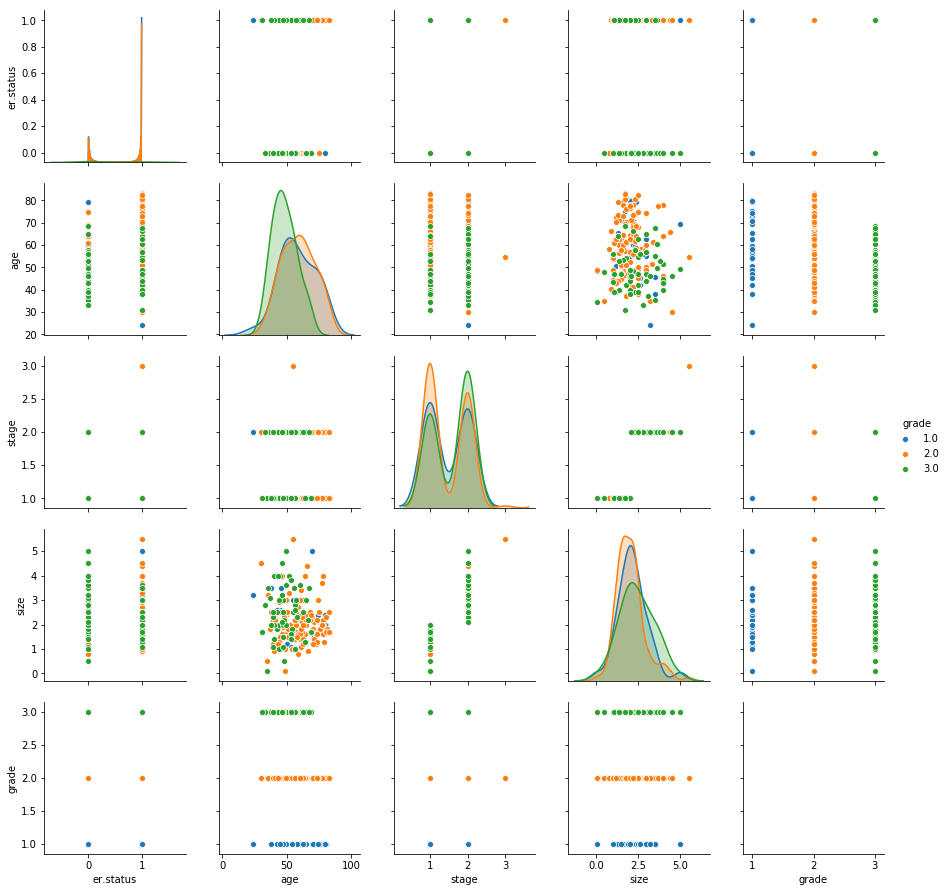

In [17]:
sns.pairplot(clinic_data, hue='grade', diag_kind='kde')
plt.show()

At glance, the dataset looks hard to split data into each grade using explicit boundary.

The age information is slightly less important because it has no explicit boundary to split grade. But, as you can see the plot, age is a little bit fine because all features is not clear to classify.

The stage information is little bit less important. But it seems to have some relation with size information. let's keep it with size information.

I think, the size information is important part in decision of grade. But, I don't know in this plot. It looks not to have some relations with grade.
But, it has relationship with stage, so I will keep it.

People who has grade 1, 2, 3 tumer went emergency room regardless of grade of tumer. So, er.status is not useful.

The other features may be useful I think.

In [18]:
clinic_data.drop(labels=['er.status'], axis=1, inplace=True)
clinic_data.head()

,age,stage,size,grade
gsm,,,,
gsm282373,53.926027,1.0,1.8,2.0
gsm282374,54.375343,2.0,2.5,3.0
gsm282376,71.260274,1.0,1.2,2.0
gsm282378,60.684931,1.0,1.8,2.0
gsm282379,60.120548,1.0,1.4,2.0


Let's look again about nan values.

In [19]:
clinic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362 entries, gsm282373 to gsm178082
Data columns (total 4 columns):
age      212 non-null float64
stage    212 non-null float64
size     212 non-null float64
grade    352 non-null float64
dtypes: float64(4)
memory usage: 24.1+ KB


I think, there are so many nan values. So, I will fill the nan values with prediction values instead of drop out them.

## Let's fill out the nan

I think, I can fill the cell of nan values by using statistics.

### age

I will draw random number from normal distribution because it's shape of distribution is similar as normal distribution as you did see above pairplot. Let me plot again.

D:\Users\jylee\Anaconda3\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Users\jylee\Anaconda3\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


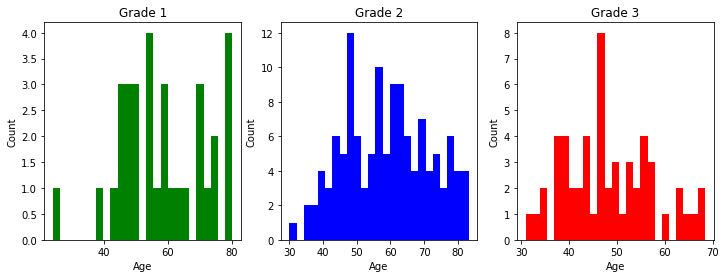

In [20]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(clinic_data[clinic_data['grade'] == 1]['age'], color='green', bins=25)
plt.title('Grade 1')
plt.xlabel('Age')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.hist(clinic_data[clinic_data['grade'] == 2]['age'], color='blue', bins=25)
plt.title('Grade 2')
plt.xlabel('Age')
plt.ylabel('Count')
plt.subplot(1, 3, 3)
plt.hist(clinic_data[clinic_data['grade'] == 3]['age'], color='red', bins=25)
plt.title('Grade 3')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Let me print stat information of age.

In [21]:
## before change

mean_age_1 = clinic_data[clinic_data['grade'] == 1]['age'].mean()
std_age_1 = clinic_data[clinic_data['grade'] == 1]['age'].std()
mean_age_2 = clinic_data[clinic_data['grade'] == 2]['age'].mean()
std_age_2 = clinic_data[clinic_data['grade'] == 2]['age'].std()
mean_age_3 = clinic_data[clinic_data['grade'] == 3]['age'].mean()
std_age_3 = clinic_data[clinic_data['grade'] == 3]['age'].std()

### Before stat ###
print('grade 1')
print('mean: ', mean_age_1)
print('std: ', std_age_1)
print('grade 2')
print('mean: ', mean_age_2)
print('std: ', std_age_2)
print('grade 3')
print('mean: ', mean_age_3)
print('std: ', std_age_3)

grade 1
mean:  58.276214215151526
std:  13.792385851982543
grade 2
mean:  58.981128768
std:  12.716903828282238
grade 3
mean:  48.319837648148145
std:  9.3043831133741


I will draw random number from normal distribution whose mean is 58 and std is 14 in grade 1.
I will draw random number from normal distribution whose mean is 59 and std is 13 in grade 2.
I will draw random number from normal distribution whose mean is 48 and std is 9 in grade 3.

In [22]:
mean_age = [mean_age_1, mean_age_2, mean_age_3]
std_age = [std_age_1, std_age_2, std_age_3]

def fill_nan_continuous(row, label, mean, std, grade):
    if row['grade'] == grade:
        if pd.isna(row[label]):
            row[label] = np.round(np.random.randn() * std + mean)
        row[label] = np.round(row[label])
    return row

In [23]:
np.random.seed(11)

clinic_data = clinic_data.apply(lambda row: fill_nan_continuous(row, 'age', mean_age[0], std_age[0], 1), axis=1)
clinic_data = clinic_data.apply(lambda row: fill_nan_continuous(row, 'age', mean_age[1], std_age[1], 2), axis=1)
clinic_data = clinic_data.apply(lambda row: fill_nan_continuous(row, 'age', mean_age[2], std_age[2], 3), axis=1)

In [24]:
## After change

print('grade 1')
print('mean: ', mean_age_1)
print('std: ', std_age_1)
print('grade 2')
print('mean: ', mean_age_2)
print('std: ', std_age_2)
print('grade 3')
print('mean: ', mean_age_3)
print('std: ', std_age_3)

grade 1
mean:  58.276214215151526
std:  13.792385851982543
grade 2
mean:  58.981128768
std:  12.716903828282238
grade 3
mean:  48.319837648148145
std:  9.3043831133741


Let me see the dataset was changed correctly.

In [25]:
clinic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362 entries, gsm282373 to gsm178082
Data columns (total 4 columns):
age      352 non-null float64
stage    212 non-null float64
size     212 non-null float64
grade    352 non-null float64
dtypes: float64(4)
memory usage: 24.1+ KB


In [26]:
# randomly sample from age.
clinic_data['age'][np.random.randint(0, 352, size=5)]

gsm
gsm107141    42.0
gsm107162    39.0
gsm107168    48.0
gsm107194    54.0
gsm178017    56.0
Name: age, dtype: float64

### size

First, Let me plot whether the size is distributed as normal.

D:\Users\jylee\Anaconda3\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Users\jylee\Anaconda3\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


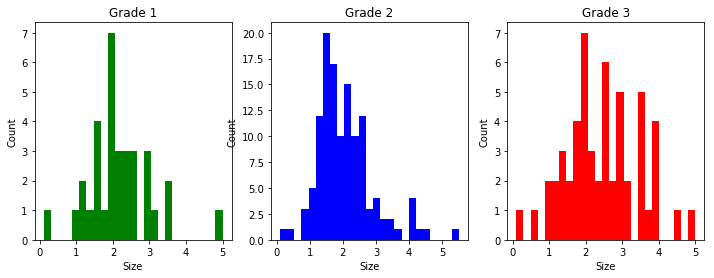

In [27]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(clinic_data[clinic_data['grade'] == 1]['size'], color='green', bins=25)
plt.title('Grade 1')
plt.xlabel('Size')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.hist(clinic_data[clinic_data['grade'] == 2]['size'], color='blue', bins=25)
plt.title('Grade 2')
plt.xlabel('Size')
plt.ylabel('Count')
plt.subplot(1, 3, 3)
plt.hist(clinic_data[clinic_data['grade'] == 3]['size'], color='red', bins=25)
plt.title('Grade 3')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

Nice! I will apply normal distribution to random sampling.

In [28]:
mean_size = [
    clinic_data[clinic_data['grade'] == 1]['size'].mean(),
    clinic_data[clinic_data['grade'] == 2]['size'].mean(),
    clinic_data[clinic_data['grade'] == 3]['size'].mean()
]

std_size = [
    clinic_data[clinic_data['grade'] == 1]['size'].std(),
    clinic_data[clinic_data['grade'] == 2]['size'].std(),
    clinic_data[clinic_data['grade'] == 3]['size'].std()
]

In [29]:
## before change

for i in range(3):
    print('grade', (i + 1))
    print('mean:', clinic_data[clinic_data['grade'] == (i + 1)]['size'].mean())
    print('mean:', clinic_data[clinic_data['grade'] == (i + 1)]['size'].std())

grade 1
mean: 2.1848484848484846
mean: 0.8976083542256932
grade 2
mean: 2.0575999999999994
mean: 0.8437879262682827
grade 3
mean: 2.4648148148148143
mean: 1.0358038364965194


In [30]:
clinic_data = clinic_data.apply(lambda row: fill_nan_continuous(row, 'size', mean_size[0], std_size[0], 1), axis=1)
clinic_data = clinic_data.apply(lambda row: fill_nan_continuous(row, 'size', mean_size[1], std_size[1], 2), axis=1)
clinic_data = clinic_data.apply(lambda row: fill_nan_continuous(row, 'size', mean_size[2], std_size[2], 3), axis=1)

In [31]:
## after change

for i in range(3):
    print('grade', (i + 1))
    print('mean:', clinic_data[clinic_data['grade'] == (i + 1)]['size'].mean())
    print('mean:', clinic_data[clinic_data['grade'] == (i + 1)]['size'].std())

grade 1
mean: 2.1666666666666665
mean: 1.027860484278505
grade 2
mean: 2.0444444444444443
mean: 0.8958141156831764
grade 3
mean: 2.4285714285714284
mean: 1.0963846049900565


### stage

Let me plot how stage is distributed.

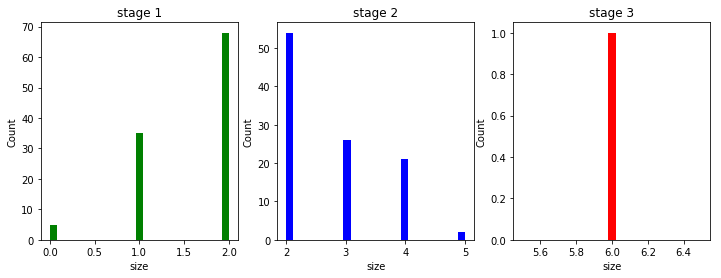

In [32]:
#sns.countplot(data=clinic_data, x='size', hue='stage')

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(clinic_data[clinic_data['stage'] == 1]['size'], color='green', bins=25)
plt.title('stage 1')
plt.xlabel('size')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.hist(clinic_data[clinic_data['stage'] == 2]['size'], color='blue', bins=25)
plt.title('stage 2')
plt.xlabel('size')
plt.ylabel('Count')
plt.subplot(1, 3, 3)
plt.hist(clinic_data[clinic_data['stage'] == 3]['size'], color='red', bins=25)
plt.title('stage 3')
plt.xlabel('size')
plt.ylabel('Count')
plt.show()

Um.. as I can see pair plot before, stage information have relation ship with size. Let me use size information to fill stage.

1. if size is less than 2, then stage becomes to 1.
2. if size is equalls to 2, then stage becomes to 1 or 2.
3. if size is less than 6, then stage becomes to 2.
4. rest stage becomes to 3.

In [33]:
def fill_stage(row):
    if pd.isna(row['stage']) == False:
        return row
    
    if row['size'] < 2:
        row['stage'] = 1
    elif row['size'] == 2:
        row['stage'] = np.random.choice([1, 2])
    elif row['size'] < 6:
        row['stage'] = 2
    else:
        row['stage'] = 3
        
    return row

In [34]:
clinic_data = clinic_data.apply(fill_stage, axis=1)

D:\Users\jylee\Anaconda3\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Users\jylee\Anaconda3\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


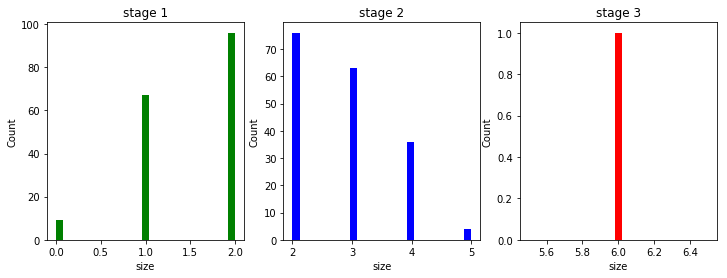

In [35]:
#sns.countplot(data=clinic_data, x='size', hue='stage')

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(clinic_data[clinic_data['stage'] == 1]['size'], color='green', bins=25)
plt.title('stage 1')
plt.xlabel('size')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.hist(clinic_data[clinic_data['stage'] == 2]['size'], color='blue', bins=25)
plt.title('stage 2')
plt.xlabel('size')
plt.ylabel('Count')
plt.subplot(1, 3, 3)
plt.hist(clinic_data[clinic_data['stage'] == 3]['size'], color='red', bins=25)
plt.title('stage 3')
plt.xlabel('size')
plt.ylabel('Count')
plt.show()

In [36]:
clinic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362 entries, gsm282373 to gsm178082
Data columns (total 4 columns):
age      352 non-null float64
stage    362 non-null float64
size     352 non-null float64
grade    352 non-null float64
dtypes: float64(4)
memory usage: 24.1+ KB


Okay. the stage columns was filled!

### Put all together

Let's see our dataset.

In [37]:
clinic_data.iloc[np.random.randint(0, 352, 10)]

,age,stage,size,grade
gsm,,,,
gsm177953,49.0,1.0,2.0,1.0
gsm177924,35.0,2.0,3.0,2.0
gsm107098,22.0,1.0,0.0,1.0
gsm282521,55.0,2.0,3.0,1.0
gsm107204,65.0,1.0,1.0,3.0
gsm107187,54.0,1.0,0.0,1.0
gsm282439,58.0,2.0,3.0,2.0
gsm107093,43.0,2.0,3.0,3.0
gsm282393,50.0,1.0,1.0,1.0


In [38]:
clinic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362 entries, gsm282373 to gsm178082
Data columns (total 4 columns):
age      352 non-null float64
stage    362 non-null float64
size     352 non-null float64
grade    352 non-null float64
dtypes: float64(4)
memory usage: 24.1+ KB


I can find the number of entries is 362 but, the number of valid rows is just 352. 
Because the grade is very important information. So, I decided that filling grade is dengerous.
Let me drop 10 rows!

I think it is ok to drop out them because the number of them is quite small.

In [39]:
clinic_data.dropna(inplace=True)

In [40]:
clinic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352 entries, gsm282373 to gsm178082
Data columns (total 4 columns):
age      352 non-null float64
stage    352 non-null float64
size     352 non-null float64
grade    352 non-null float64
dtypes: float64(4)
memory usage: 13.8+ KB


Let's see the relation of each features!

D:\Users\jylee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Users\jylee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Users\jylee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Users\jylee\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


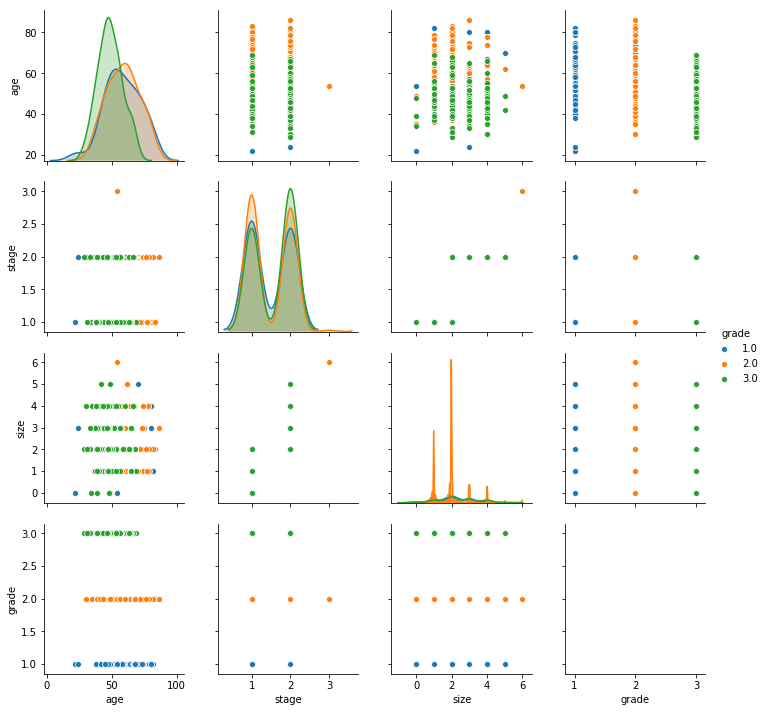

In [41]:
sns.pairplot(clinic_data, hue='grade', diag_kind='kde')
plt.show()

Let's print correlation.

In [42]:
clinic_data.corr()

,age,stage,size,grade
age,1.000000,-0.064957,-0.053932,-0.306495
stage,-0.064957,1.000000,0.682745,0.076187
size,-0.053932,0.682745,1.000000,0.117862
grade,-0.306495,0.076187,0.117862,1.000000


At seeing overall, the correlation between grade and age is quite large, and between stage and size is quite large.
Rest correlation is quite small.

# Gene data preprocessing

Next, I will preprocess gene dataset.

In [43]:
gene_data.head()

,gsm282373,gsm282374,gsm282376,gsm282378,gsm282379,gsm282380,gsm282382,gsm282383,gsm282386,gsm282391,...,gsm107180,gsm107181,gsm107182,gsm107183,gsm107184,gsm107185,gsm107186,gsm107187,gsm107188,gsm107190
genename,,,,,,,,,,,,,,,,,,,,,
DDR1,10.830880,11.415693,11.102564,9.887807,11.070358,10.472188,10.470059,10.435266,10.521953,10.870826,...,11.284514,10.447881,10.530046,10.884212,10.254828,10.670846,8.786126,10.661680,10.703359,10.518693
RFC2,6.537210,6.520366,6.582786,7.093003,6.581049,6.968399,6.539901,7.011500,6.997391,6.790450,...,6.370906,6.571489,6.422459,6.878336,6.380203,6.331382,6.419317,6.192183,6.401563,5.951992
HSPA6,7.277863,7.316761,7.279104,7.286577,7.519710,7.450327,6.911198,7.405124,7.516294,7.464333,...,7.795050,7.390194,7.325931,7.585992,7.586850,7.549852,7.488433,8.141492,7.345247,7.492094
PAX8,9.740926,9.645825,9.859698,9.319635,9.287543,9.320164,9.241064,9.204484,9.509921,9.438572,...,9.996307,10.113618,10.453775,10.462783,10.478436,10.305541,10.224340,10.393858,10.358396,10.062984
GUCA1A,5.267913,5.116714,5.090731,5.085679,5.177971,5.162901,5.115369,5.092952,5.125900,4.967165,...,5.353165,5.217218,5.079343,5.189899,5.185406,5.210108,5.133257,5.156300,5.106015,5.164850


First, I will transpose it to make genes as features.

In [44]:
gene_data = gene_data.T

In [45]:
print('Shape:', gene_data.shape)
gene_data.head()

Shape: (255, 19560)


genename,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,CYP2E1,...,ADAP1,LRCH4,LRTM1,DGCR8,EXOSC4,EHBP1L1,MEX3D,EPS8L1,BCAN,DCAF15
gsm282373,10.830880,6.537210,7.277863,9.740926,5.267913,7.382774,8.588972,5.464588,6.818210,5.530614,...,9.308550,7.728298,5.338729,6.759724,9.314672,6.779964,7.442115,7.758906,8.044996,7.761478
gsm282374,11.415693,6.520366,7.316761,9.645825,5.116714,8.207070,7.527786,5.451635,6.455215,5.403731,...,10.049733,7.931912,5.356809,6.727976,8.628219,6.619555,5.829318,8.687569,8.059875,7.424818
gsm282376,11.102564,6.582786,7.279104,9.859698,5.090731,7.999345,7.167136,5.364455,7.515767,5.422672,...,9.519055,8.016544,5.346218,6.607924,8.029696,7.187482,6.490046,8.857435,7.932893,7.571570
gsm282378,9.887807,7.093003,7.286577,9.319635,5.085679,8.332940,6.756487,5.629505,7.939541,5.503958,...,9.161944,7.733086,5.246947,6.772989,8.418591,7.013464,8.079909,7.705978,7.496283,7.743633
gsm282379,11.070358,6.581049,7.519710,9.287543,5.177971,7.973080,6.754006,5.398641,9.130576,5.434248,...,9.486164,7.460552,5.186822,6.786288,8.512647,7.175655,6.982805,8.728241,7.495365,8.007842


Let me print the information of columns.

In [46]:
gene_data.columns

Index(['DDR1', 'RFC2', 'HSPA6', 'PAX8', 'GUCA1A', 'UBA7', 'THRA', 'PTPN21',
       'CCL5', 'CYP2E1',
       ...
       'ADAP1', 'LRCH4', 'LRTM1', 'DGCR8', 'EXOSC4', 'EHBP1L1', 'MEX3D',
       'EPS8L1', 'BCAN', 'DCAF15'],
      dtype='object', name='genename', length=19560)

In [47]:
gene_data.columns.nunique()

13013

Oh, there must be duplicated columns.

I will keep all duplicated gene.

In [48]:
gene_data.iloc[:, gene_data.columns.duplicated()].head()

genename,GDI2,HNRNPU,EIF3A,HSP90B1,PRKAR1A,PRKAR1A,RAD21,WDR1,AP2B1,MLEC,...,ACSM5,ADAP1,LRCH4,LRTM1,DGCR8,EXOSC4,EHBP1L1,EPS8L1,BCAN,DCAF15
gsm282373,12.023171,11.610638,10.622652,11.591260,8.769198,10.351178,10.236587,10.245625,9.088987,9.423920,...,7.146255,9.308550,7.728298,5.338729,6.759724,9.314672,6.779964,7.758906,8.044996,7.761478
gsm282374,11.860564,11.478980,10.456297,12.252396,9.437780,11.275321,10.338221,10.000757,8.620855,10.323952,...,7.128942,10.049733,7.931912,5.356809,6.727976,8.628219,6.619555,8.687569,8.059875,7.424818
gsm282376,11.830319,11.812078,9.941387,11.778595,8.505857,10.541397,9.817232,10.484564,8.406214,9.576418,...,7.100343,9.519055,8.016544,5.346218,6.607924,8.029696,7.187482,8.857435,7.932893,7.571570
gsm282378,11.961541,11.643649,10.044256,11.650524,8.964665,10.258182,9.973082,10.881063,9.029704,10.054164,...,6.491838,9.161944,7.733086,5.246947,6.772989,8.418591,7.013464,7.705978,7.496283,7.743633
gsm282379,12.044651,11.744490,10.059707,12.128441,9.712342,11.088329,11.542303,11.015005,9.977628,9.774750,...,6.567668,9.486164,7.460552,5.186822,6.786288,8.512647,7.175655,8.728241,7.495365,8.007842


I will rename them!

In [49]:
columns = []
duplicated_columns = {}

for c in gene_data.columns:
    if c not in duplicated_columns and len(gene_data[c].shape) == 1:
        columns.append(c)
    else:
        if c not in duplicated_columns:
            duplicated_columns[c] = 0
        duplicated_columns[c] += 1
        columns.append("{0}_{1}".format(c, duplicated_columns[c]))
        
gene_data.columns = columns
    
gene_data.shape

(255, 19560)

We need grade information. So let me concat two data frame.

In [50]:
total_data = pd.merge(clinic_data, gene_data, how='right', left_index=True, right_index=True)

print('Shape:', total_data.shape)
total_data.head()

Shape: (255, 19564)


,age,stage,size,grade,DDR1_1,RFC2_1,HSPA6_1,PAX8_1,GUCA1A_1,UBA7_1,...,ADAP1_2,LRCH4_3,LRTM1_2,DGCR8_3,EXOSC4_3,EHBP1L1_2,MEX3D,EPS8L1_5,BCAN_3,DCAF15_3
gsm282373,54.0,1.0,2.0,2.0,10.830880,6.537210,7.277863,9.740926,5.267913,7.382774,...,9.308550,7.728298,5.338729,6.759724,9.314672,6.779964,7.442115,7.758906,8.044996,7.761478
gsm282374,54.0,2.0,2.0,3.0,11.415693,6.520366,7.316761,9.645825,5.116714,8.207070,...,10.049733,7.931912,5.356809,6.727976,8.628219,6.619555,5.829318,8.687569,8.059875,7.424818
gsm282376,71.0,1.0,1.0,2.0,11.102564,6.582786,7.279104,9.859698,5.090731,7.999345,...,9.519055,8.016544,5.346218,6.607924,8.029696,7.187482,6.490046,8.857435,7.932893,7.571570
gsm282378,61.0,1.0,2.0,2.0,9.887807,7.093003,7.286577,9.319635,5.085679,8.332940,...,9.161944,7.733086,5.246947,6.772989,8.418591,7.013464,8.079909,7.705978,7.496283,7.743633
gsm282379,60.0,1.0,1.0,2.0,11.070358,6.581049,7.519710,9.287543,5.177971,7.973080,...,9.486164,7.460552,5.186822,6.786288,8.512647,7.175655,6.982805,8.728241,7.495365,8.007842


Let me see whether there are some nan values.

In [51]:
for label in total_data.columns:
    n = total_data[label].dropna().shape[0]
    if n != 255:
        print('{0}: {1}'.format(label, n))

age: 246
stage: 246
size: 246
grade: 246


Ok, some patients has no information what grade they have.
We didn't do same approach as I did in preprocessing of clinic data.
Because grade information is so important, and should be precise.

So, I will drop na.

In [52]:
total_data.dropna(inplace=True)
total_data.shape

(246, 19564)

Okay. I want to plot my dataset to see how datapoints are distributed.

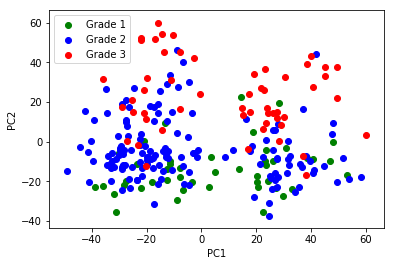

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(total_data.drop(columns='grade'))

pca_f = pca.transform(total_data.drop(columns='grade'))

plt.scatter(pca_f[total_data['grade'] == 1][:, 0], pca_f[total_data['grade'] == 1][:, 1], c='green')
plt.scatter(pca_f[total_data['grade'] == 2][:, 0], pca_f[total_data['grade'] == 2][:, 1], c='blue')
plt.scatter(pca_f[total_data['grade'] == 3][:, 0], pca_f[total_data['grade'] == 3][:, 1], c='red')
plt.legend(['Grade 1', 'Grade 2', 'Grade 3'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Um.. datapoints seem to be hard to classify. Okay, it seems to need more preprocessing.

### Remove irrelevant genes.

##### My method is same as TA's method accidentlly. I implemented this solution before seeing TA's solution.

In my opinion, in each stages each genes has different effect on tumor.

So, to find irrelevant genes, I will do following.
1. For each genes, compute mean and standard deviation with respect to each grade. (means, stds)
2. For each genes, compute mean regardless of grade. (total_mean)
3. Compute (means - total_mean)^2 for each grade.
4. Compute score by dividing temp by stds. then, I now get scores of each genes for each grade.
5. Pick the n highest scores in each grade.

Now, I have 3 array of genes.

First one, the most outstanding genes in grade 1.
Second one, the most outstanding genes in grade 2.
Third one, the most outstanding genes in grade 3.

In [54]:
# get list of name of gene.

names_gene = gene_data.columns
names_gene

Index(['DDR1_1', 'RFC2_1', 'HSPA6_1', 'PAX8_1', 'GUCA1A_1', 'UBA7_1', 'THRA_1',
       'PTPN21_1', 'CCL5_1', 'CYP2E1_1',
       ...
       'ADAP1_2', 'LRCH4_3', 'LRTM1_2', 'DGCR8_3', 'EXOSC4_3', 'EHBP1L1_2',
       'MEX3D', 'EPS8L1_5', 'BCAN_3', 'DCAF15_3'],
      dtype='object', length=19560)

In [55]:
means = np.zeros((3, total_data.shape[1] - 4))
stds = np.zeros((3, total_data.shape[1] - 4))

for g in range(3):
    means[g, :] = total_data[total_data['grade'] == (g + 1)].iloc[:, 4:].mean(axis=0)
    stds[g, :] = total_data[total_data['grade'] == (g + 1)].iloc[:, 4:].std(axis=0)

In [56]:
def gene_scores(means, stds, labels):
    
    total_mean = np.mean(means, axis=0)
    
    mean_diff = means - total_mean.reshape(1, means.shape[1])
    scores = np.divide(mean_diff, stds)
    scores = scores ** 2
    
    return scores

In [57]:
scores = gene_scores(means, stds, names_gene)

Let me print max and min scores in each grades.

In [58]:
for g in range(3):
    print('grade {}'.format(g + 1))
    print('max score: {}'.format(scores[g].max()))
    print('min score: {}'.format(scores[g].min()))

grade 1
max score: 4.245688788471497
min score: 1.1533134083457587e-13
grade 2
max score: 0.5375497412357481
min score: 3.537744823550878e-11
grade 3
max score: 2.680058342737712
min score: 1.6483277216112877e-11


Let me set 0.54 as threshold in grade 1, 0.128 in grade 2, 0.485 in grade 3 to make the number in each grade is about 300.

In [59]:
th_score_one = 0.54
th_score_two = 0.128
th_score_three = 0.485

useful_labels_grade_one = names_gene[scores[0] > th_score_one]
useful_labels_grade_two = names_gene[scores[1] > th_score_two]
useful_labels_grade_three = names_gene[scores[2] > th_score_three]

In [60]:
print('useful in grade 1:', useful_labels_grade_one.shape)
print('useful in grade 2:', useful_labels_grade_two.shape)
print('useful in grade 3:', useful_labels_grade_three.shape)

useful in grade 1: (304,)
useful in grade 2: (303,)
useful in grade 3: (309,)


In [61]:
useful_labels = np.concatenate([useful_labels_grade_one, useful_labels_grade_two, useful_labels_grade_three], axis=0)
print(useful_labels.shape)

(916,)


In [62]:
useful_labels = np.unique(useful_labels)
print(useful_labels.shape)

(820,)


Now, I picked several genes!

Let me search for them in google.

In [63]:
useful_labels

array(['ABAT_2', 'ABAT_3', 'AC010531.1_2', 'AC012476.1_2', 'AC023490.3',
       'AC027644.4', 'AC068831.7', 'AC240274.1', 'AC243922.3', 'ACACB_2',
       'ACACB_3', 'ACACB_4', 'ACE2_1', 'ACE2_2', 'ACHE_2', 'ACRV1_2',
       'ACRV1_4', 'ACSF2', 'ADGRG6', 'ADRA2A', 'AEBP1', 'AFF1_1', 'AFP',
       'AGGF1_2', 'AGO2', 'AGTPBP1', 'AHNAK_1', 'AHSA2P', 'AK6',
       'AL049869.1', 'AL158066.1', 'ALG13_1', 'ALG3', 'ALOX12', 'ANG_2',
       'ANKHD1-EIF4EBP3', 'ANKHD1_1', 'ANKMY2', 'ANKRA2', 'ANKRD12_1',
       'ANKRD12_2', 'ANP32E_1', 'AP2A2_1', 'AP2A2_2', 'APOBEC3B',
       'ARHGAP22', 'ARHGEF12_2', 'ARL1_2', 'ARNT_2', 'ARPC5L', 'ART3',
       'ASAH1_1', 'ASF1B', 'ASPM', 'ATG14', 'ATP11A_2', 'ATP2B4_1',
       'ATP5F1C_2', 'ATP5F1C_3', 'AUNIP', 'AURKA_1', 'AURKA_2', 'AURKB',
       'AZGP1_1', 'BAZ2B', 'BBIP1_2', 'BBOF1', 'BCL11A_1', 'BCL11A_2',
       'BCL11A_3', 'BCL11B', 'BCL2L14', 'BCL2_2', 'BID_2', 'BIN2',
       'BIRC5_1', 'BIRC5_2', 'BIRC5_3', 'BLM', 'BPI', 'BRCA2_2', 'BRD8_1',
       'BT

##### ACACB
Ma, L., Mondal, A. K., Murea, M., Sharma, N. K., Tönjes, A., Langberg, K. A., Das, S. K., Franks, P. W., Kovacs, P., Antinozzi, P. A., Stumvoll, M., Parks, J. S., Elbein, S. C., … Freedman, B. I. (2011). The effect of ACACB cis-variants on gene expression and metabolic traits. PloS one, 6(8), e23860.

##### ACE2
Yu, C., Tang, W., Wang, Y., Shen, Q., Wang, B., Cai, C., … Zou, F. (2016). Downregulation of ACE2/Ang-(1-7)/Mas axis promotes breast cancer metastasis by enhancing store-operated calcium entry. Cancer Letters, 376(2), 268–277. http://doi.org/10.1016/j.canlet.2016.04.006

##### ALOX12
Liu P, Lu Y, Recker RR, Deng HW, Dvornyk V. ALOX12 gene is associated with the onset of natural menopause in white women. Menopause. 2010;17(1):152-6.

##### ANKRA2
Nie, J., Xu, C., Jin, J., Aka, J. A., Tempel, W., Nguyen, V., … Yang, X.-J. (2015). Ankyrin repeats of ANKRA2 recognize a PxLPxL motif on the 3M syndrome protein CCDC8. Structure (London, England : 1993), 23(4), 700–712. https://doi.org/10.1016/j.str.2015.02.001

##### APOBEC3B
Tokunaga, E., Yamashita, N., Tanaka, K., Inoue, Y., Akiyoshi, S., Saeki, H., Oki, E., Kitao, H., … Maehara, Y. (2016). Expression of APOBEC3B mRNA in Primary Breast Cancer of Japanese Women. PloS one, 11(12), e0168090. doi:10.1371/journal.pone.0168090


##### ARHGAP22
Feng, M., Bao, Y., Li, Z., Li, J., Gong, M., Lam, S., … Yu, Q. (2014). RASAL2 activates RAC1 to promote triple-negative breast cancer progression. The Journal of Clinical Investigation, 124(12), 5291–5304. http://doi.org/10.1172/JCI76711

##### ART3
Tan L, Song X, Sun X, Wang N, Qu Y, Sun Z. ART3 regulates triple-negative breast cancer cell function via activation of Akt and ERK pathways. Oncotarget. 2016;7(29):46589-46602.

##### ASF1B
Corpet, A., De Koning, L., Toedling, J., Savignoni, A., Berger, F., Lemaître, C., O'Sullivan, R. J., Karlseder, J., Barillot, E., Asselain, B., Sastre-Garau, X., … Almouzni, G. (2010). Asf1b, the necessary Asf1 isoform for proliferation, is predictive of outcome in breast cancer. The EMBO journal, 30(3), 480-93.

##### ASPM
Alsiary, R., Brüning-Richardson, A., Bond, J., Morrison, E. E., Wilkinson, N., & Bell, S. M. (2014). Deregulation of microcephalin and ASPM expression are correlated with epithelial ovarian cancer progression. PloS one, 9(5), e97059. doi:10.1371/journal.pone.0097059

##### AURKA
Staff, S., Isola, J., Jumppanen, M., & Tanner, M. (2010). Aurora-A gene is frequently amplified in basal-like breast cancer. Oncology Reports, 23(2), 307–312.

##### AURKB
Ou, O., Huppi, K., Chakka, S., Gehlhaus, K., Dubois, W., Patel, J., Chen, J., Mackiewicz, M., Jones, T. L., Pitt, J. J., Martin, S. E., Goldsmith, P., Simmons, J. K., Mock, B. A., … Caplen, N. J. (2014). Loss-of-function RNAi screens in breast cancer cells identify AURKB, PLK1, PIK3R1, MAPK12, PRKD2, and PTK6 as sensitizing targets of rapamycin activity. Cancer letters, 354(2), 336-47.

##### BBIP1
Jadaliha M, Gholamalamdari O, Tang W, Zhang Y, Petracovici A, et al. (2018) A natural antisense lncRNA controls breast cancer progression by promoting tumor suppressor gene mRNA stability. PLOS Genetics 14(11): e1007802. https://doi.org/10.1371/journal.pgen.1007802

##### BBOF1
Joe, S., & Nam, H. (2016). Prognostic factor analysis for breast cancer using gene expression profiles. BMC Medical Informatics and Decision Making, 16(1), 56. https://doi.org/10.1186/s12911-016-0292-5

##### BCL11A
Khaled, W. T., Choon Lee, S., Stingl, J., Chen, X., Raza Ali, H., Rueda, O. M., … Liu, P. (2015). BCL11A is a triple-negative breast cancer gene with critical functions in stem and progenitor cells. Nature Communications, 6, 5987. Retrieved from https://doi.org/10.1038/ncomms6987

##### BCL2L14
Giam, M., Okamoto, T., Mintern, J. D., Strasser, A., & Bouillet, P. (2012). Bcl-2 family member Bcl-G is not a proapoptotic protein. Cell Death &Amp; Disease, 3, e404. Retrieved from https://doi.org/10.1038/cddis.2012.130

##### BCL2
Eom, Y. H., Kim, H. S., Lee, A., Song, B. J., & Chae, B. J. (2016). BCL2 as a Subtype-Specific Prognostic Marker for Breast Cancer. Journal of breast cancer, 19(3), 252-260.

##### BID
Kazhdan, I., Long, L., Montellano, R., Cavazos, D. A., & Marciniak, R. A. (2006). Targeted gene therapy for breast cancer with truncated Bid. Cancer Gene Therapy, 13(2), 141–149. https://doi.org/10.1038/sj.cgt.7700867

##### BIRC5
Hamy, A. S., Bieche, I., Lehmann-Che, J., Scott, V., Bertheau, P., Guinebretiere, J. M., … de Cremoux, P. (2016). BIRC5 (survivin): a pejorative prognostic marker in stage II/III breast cancer with no response to neoadjuvant chemotherapy. Breast Cancer Research and Treatment, 159(3), 499–511. http://doi.org/10.1007/s10549-016-3961-2

##### BUB1
Article Source: Biological and Clinical Significance of MAD2L1 and BUB1, Genes Frequently Appearing in Expression Signatures for Breast Cancer Prognosis 
Wang Z, Katsaros D, Shen Y, Fu Y, Canuto EM, et al. (2015) Biological and Clinical Significance of MAD2L1 and BUB1, Genes Frequently Appearing in Expression Signatures for Breast Cancer Prognosis. PLOS ONE 10(8): e0136246. https://doi.org/10.1371/journal.pone.0136246

##### BUB1B
Yuan, B., Xu, Y., Woo, J.-H., Wang, Y., Bae, Y. K., Yoon, D.-S., … Gabrielson, E. (2006). Increased expression of mitotic checkpoint genes in breast cancer cells with chromosomal instability. Clinical Cancer Research : An Official Journal of the American Association for Cancer Research, 12(2), 405–410. http://doi.org/10.1158/1078-0432.CCR-05-0903

##### BYSL
Azzato, E. M., Driver, K. E., Lesueur, F., Shah, M., Greenberg, D., Easton, D. F., … Pharoah, P. D. P. (2008). Effects of common germline genetic variation in cell cycle control genes on breast cancer survival: results from a population-based cohort. Breast Cancer Research : BCR, 10(3), R47. https://doi.org/10.1186/bcr2100

##### CACNA1D
Phan NN, Wang CY, Chen CF, Sun Z, Lai MD, Lin YC. Voltage-gated calcium channels: Novel targets for cancer therapy. Oncol Lett. 2017;14(2):2059-2074.

##### CALB1
Obermayr E, Sanchez-Cabo F, Tea MK, et al. Assessment of a six gene panel for the molecular detection of circulating tumor cells in the blood of female cancer patients. BMC Cancer. 2010;10:666. Published 2010 Dec 3. doi:10.1186/1471-2407-10-666

##### CASC1
Berndt, A., Cario, C. L., Silva, K. A., Kennedy, V. E., Harrison, D. E., Paigen, B., & Sundberg, J. P. (2011). Identification of &lt;em&gt;Fat4&lt;/em&gt; and &lt;em&gt;Tsc22d1&lt;/em&gt; as Novel Candidate Genes for Spontaneous Pulmonary Adenomas. Cancer Research, 71(17), 5779 LP-5791. Retrieved from http://cancerres.aacrjournals.org/content/71/17/5779.abstract

##### CCDC170
Jiang, P., Li, Y., Poleshko, A., Medvedeva, V., Baulina, N., Zhang, Y., Zhou, Y., Slater, C. M., Pellegrin, T., Wasserman, J., Lindy, M., Efimov, A., Daly, M., Katz, R. A., … Chen, X. (2017). The Protein Encoded by the CCDC170 Breast Cancer Gene Functions to Organize the Golgi-Microtubule Network. EBioMedicine, 22, 28-43.

##### CCNA2
Gao, T., Han, Y., Yu, L., Ao, S., Li, Z., & Ji, J. (2014). CCNA2 is a prognostic biomarker for ER+ breast cancer and tamoxifen resistance. PloS One, 9(3), e91771. http://doi.org/10.1371/journal.pone.0091771

##### CCNB2
Shubbar, E., Kovács, A., Hajizadeh, S., Parris, T. Z., Nemes, S., Gunnarsdóttir, K., … Helou, K. (2013). Elevated cyclin B2 expression in invasive breast carcinoma is associated with unfavorable clinical outcome. BMC Cancer, 13(1), 1. http://doi.org/10.1186/1471-2407-13-1

##### CCNE1
Zhao, H., Wang, J., Zhang, Y., Yuan, M., Yang, S., Li, L., & Yang, H. (2018). Prognostic Values of CCNE1 Amplification and Overexpression in Cancer Patients: A Systematic Review and Meta-analysis. Journal of Cancer, 9(13), 2397-2407. doi:10.7150/jca.24179

##### CCNE2
Tormo, E., Adam-Artigues, A., Ballester, S., Pineda, B., Zazo, S., González-Alonso, P., … Eroles, P. (2017). The role of miR-26a and miR-30b in HER2+ breast cancer trastuzumab resistance and regulation of the CCNE2 gene. Scientific Reports, 7, 41309. Retrieved from https://doi.org/10.1038/srep41309

##### CCPG1
Smith, M. D., Harley, M. E., Kemp, A. J., Wills, J., Lee, M., Arends, M., … Wilkinson, S. (2018). CCPG1 Is a Non-canonical Autophagy Cargo Receptor Essential for ER-Phagy and Pancreatic ER Proteostasis. Developmental Cell, 44(2), 217—232.e11. https://doi.org/10.1016/j.devcel.2017.11.024

##### CD207
Dyduch, G., Tyrak, K. E., Glajcar, A., Szpor, J., & Okoń, K. (2017). CD207+/langerin positive dendritic cells in invasive and in situ cutaneous malignant melanoma. Postepy dermatologii i alergologii, 34(3), 233-239.

##### CD7
Sidaway, P. (2017). Genomic disruption of CD7 avoids fractricide. Nature Reviews Clinical Oncology, 14, 458. Retrieved from https://doi.org/10.1038/nrclinonc.2017.91

##### CDC20
Wang Z, Wan L, Zhong J, et al. Cdc20: a potential novel therapeutic target for cancer treatment. Curr Pharm Des. 2013;19(18):3210-4.

##### CDC25A
Cangi, M. G., Cukor, B., Soung, P., Signoretti, S., Moreira, G., Ranashinge, M., Cady, B., Pagano, M., … Loda, M. (2000). Role of the Cdc25A phosphatase in human breast cancer. The Journal of clinical investigation, 106(6), 753-61.

##### CDC45
Oyola, S. O., Bringaud, F., & Melville, S. E. (2009). A kinetoplastid BRCA2 interacts with DNA replication protein CDC45. International Journal for Parasitology, 39(1), 59–69. http://doi.org/10.1016/j.ijpara.2008.07.002

##### CDCA3
Phan, N. N., Wang, C.-Y., Li, K.-L., Chen, C.-F., Chiao, C.-C., Yu, H.-G., … Lin, Y.-C. (2018). Distinct expression of CDCA3, CDCA5, and CDCA8 leads to shorter relapse free survival in breast cancer patient. Oncotarget, 9(6), 6977–6992. http://doi.org/10.18632/oncotarget.24059

##### CDCA8
Phan, N. N., Wang, C.-Y., Li, K.-L., Chen, C.-F., Chiao, C.-C., Yu, H.-G., … Lin, Y.-C. (2018). Distinct expression of CDCA3, CDCA5, and CDCA8 leads to shorter relapse free survival in breast cancer patient. Oncotarget, 9(6), 6977–6992. http://doi.org/10.18632/oncotarget.24059

##### CDH19
Kools, P., Van Imschoot, G., & van Roy, F. (2000). Characterization of Three Novel Human Cadherin Genes (CDH7, CDH19, and CDH20) Clustered on Chromosome 18q22–q23 and with High Homology to Chicken Cadherin-7. Genomics, 68(3), 283–295. http://doi.org/https://doi.org/10.1006/geno.2000.6305

##### CDK1
Bednarek, K., Kiwerska, K., Szaumkessel, M., Bodnar, M., Kostrzewska-Poczekaj, M., Marszalek, A., Janiszewska, J., Bartochowska, A., Jackowska, J., Wierzbicka, M., Grenman, R., Szyfter, K., Giefing, M., … Jarmuz-Szymczak, M. (2016). Recurrent CDK1 overexpression in laryngeal squamous cell carcinoma. Tumour biology : the journal of the International Society for Oncodevelopmental Biology and Medicine, 37(8), 11115-26.

##### CDK7
Patel, H., Abduljabbar, R., Lai, C. F., Periyasamy, M., Harrod, A., Gemma, C., Steel, J. H., Patel, N., Busonero, C., Jerjees, D., Remenyi, J., Smith, S., Gomm, J. J., Magnani, L., Győrffy, B., Jones, L. J., Fuller-Pace, F., Shousha, S., Buluwela, L., Rakha, E. A., Ellis, I. O., Coombes, R. C., … Ali, S. (2016). Expression of CDK7, Cyclin H, and MAT1 Is Elevated in Breast Cancer and Is Prognostic in Estrogen Receptor-Positive Breast Cancer. Clinical cancer research : an official journal of the American Association for Cancer Research, 22(23), 5929-5938.

##### CDKN2A
Debniak, T., Górski, B., Huzarski, T., Byrski, T., Cybulski, C., Mackiewicz, A., Gozdecka-Grodecka, S., Gronwald, J., Kowalska, E., Haus, O., Grzybowska, E., Stawicka, M., Swiec, M., Urbański, K., Niepsuj, S., Waśko, B., Góźdź, S., Wandzel, P., Szczylik, C., Surdyka, D., Rozmiarek, A., Zambrano, O., Posmyk, M., Narod, S. A., … Lubinski, J. (2005). A common variant of CDKN2A (p16) predisposes to breast cancer. Journal of medical genetics, 42(10), 763-5.

##### CDKN3
Deng, M., Wang, J., Chen, Y., Zhang, L., Xie, G., Liu, Q., … Liu, D. (2016). Silencing cyclin-dependent kinase inhibitor 3 inhibits the migration of breast cancer cell lines. Molecular Medicine Reports, 14(2), 1523–1530. http://doi.org/10.3892/mmr.2016.5401

##### CDT1
Mahadevappa, R., Neves, H., Yuen, S. M., Bai, Y., McCrudden, C. M., Yuen, H. F., Wen, Q., Zhang, S. D., … Kwok, H. F. (2017). The prognostic significance of Cdc6 and Cdt1 in breast cancer. Scientific reports, 7(1), 985. doi:10.1038/s41598-017-00998-9

##### CENPA
Sun, X., Clermont, P.-L., Jiao, W., Helgason, C. D., Gout, P. W., Wang, Y., & Qu, S. (2016). Elevated expression of the centromere protein-A(CENP-A)-encoding gene as a prognostic and predictive biomarker in human cancers. International Journal of Cancer, 139(4), 899–907. http://doi.org/10.1002/ijc.30133

##### CENPM
Komatsu, M., Yoshimaru, T., Matsuo, T., Kiyotani, K., Miyoshi, Y., Tanahashi, T., Rokutan, K., Yamaguchi, R., Saito, A., Imoto, S., Miyano, S., Nakamura, Y., Sasa, M., Shimada, M., Katagiri, T."Molecular features of triple negative breast cancer cells by genome-wide gene expression profiling analysis". International Journal of Oncology 42, no. 2 (2013): 478-506. https://doi.org/10.3892/ijo.2012.1744

##### CENPN
Huang, C. G., Li, F. X., Pan, S., Xu, C. B., Dai, J. Q., & Zhao, X. H. (2017). Identification of genes associated with castration‑resistant prostate cancer by gene expression profile analysis. Molecular medicine reports, 16(5), 6803-6813.

##### CHAF1B
Peng, X., Fu, H., Yin, J., Zhao, Q."CHAF1B knockdown blocks migration in a hepatocellular carcinoma model". Oncology Reports 40, no. 1 (2018): 405-413. https://doi.org/10.3892/or.2018.6437

##### CHEK1
Lin, W.-Y., Brock, I. W., Connley, D., Cramp, H., Tucker, R., Slate, J., … Cox, A. (2013). Associations of ATR and CHEK1 single nucleotide polymorphisms with breast cancer. PloS One, 8(7), e68578. http://doi.org/10.1371/journal.pone.0068578

##### CHST2
Potapenko, I. O., Lüders, T., Russnes, H. G., Helland, Å., Sørlie, T., Kristensen, V. N., Nord, S., Lingjærde, O. C., Børresen-Dale, A. L., … Haakensen, V. D. (2015). Glycan-related gene expression signatures in breast cancer subtypes; relation to survival. Molecular oncology, 9(4), 861-76.

##### CIRBP
Guo, X., Wu, Y., & Hartley, R. S. (2010). Cold-inducible RNA-binding protein contributes to human antigen R and cyclin E1 deregulation in breast cancer. Molecular Carcinogenesis, 49(2), 130–140. https://doi.org/10.1002/mc.20582

##### CKS2
You, H., Lin, H., & Zhang, Z. (2015). CKS2 in human cancers: Clinical roles and current perspectives (Review). Molecular and clinical oncology, 3(3), 459-463.

##### CLK1
Araki, S., Dairiki, R., Nakayama, Y., Murai, A., Miyashita, R., Iwatani, M., Nomura, T., … Nakanishi, O. (2015). Inhibitors of CLK protein kinases suppress cell growth and induce apoptosis by modulating pre-mRNA splicing. PloS one, 10(1), e0116929. doi:10.1371/journal.pone.0116929

##### CLK4
da Silva, M. R., Moreira, G. A., Gonçalves da Silva, R. A., de Almeida Alves Barbosa, É., Pais Siqueira, R., Teixera, R. R., Almeida, M. R., Silva Júnior, A., Fietto, J. L., … Bressan, G. C. (2015). Splicing Regulators and Their Roles in Cancer Biology and Therapy. BioMed research international, 2015, 150514.

##### CNR1
Laprairie, R. B., Kelly, M. E., & Denovan-Wright, E. M. (2012). The dynamic nature of type 1 cannabinoid receptor (CB(1) ) gene transcription. British journal of pharmacology, 167(8), 1583-95.

##### COL16A1
Januchowski, R., Zawierucha, P., Ruciński, M., Nowicki, M., & Zabel, M. (2014). Extracellular matrix proteins expression profiling in chemoresistant variants of the A2780 ovarian cancer cell line. BioMed research international, 2014, 365867.

##### COX7C
Roos, L., van Dongen, J., Bell, C. G., Burri, A., Deloukas, P., Boomsma, D. I., Spector, T. D., … Bell, J. T. (2016). Integrative DNA methylome analysis of pan-cancer biomarkers in cancer discordant monozygotic twin-pairs. Clinical epigenetics, 8, 7. doi:10.1186/s13148-016-0172-y

##### CRY2
Mao, Y., Fu, A., Hoffman, A. E., Jacobs, D. I., Jin, M., Chen, K., & Zhu, Y. (2015). The circadian gene CRY2 is associated with breast cancer aggressiveness possibly  via epigenomic modifications. Tumour Biology : The Journal of the International Society for Oncodevelopmental Biology and Medicine, 36(5), 3533–3539. http://doi.org/10.1007/s13277-014-2989-3

##### CST5
Hünten, S., & Hermeking, H. (2015). p53 directly activates cystatin D/CST5 to mediate mesenchymal-epithelial transition: a possible link to tumor suppression by vitamin D3. Oncotarget, 6(18), 15842-56.

##### CTSV
Cosphiadi, I., Atmakusumah, T. D., Siregar, N. C., Muthalib, A., Harahap, A., & Mansyur, M. (2018). Bone Metastasis in Advanced Breast Cancer: Analysis of Gene Expression Microarray. Clinical Breast Cancer, 18(5), e1117–e1122. http://doi.org/https://doi.org/10.1016/j.clbc.2018.03.001

##### CXCL5
Hu, B., Fan, H., Lv, X., Chen, S., & Shao, Z. (2018). Prognostic significance of CXCL5 expression in cancer patients: a meta-analysis. Cancer cell international, 18, 68. doi:10.1186/s12935-018-0562-7

##### CYBRD1
Lemler, D. J., Lynch, M. L., Tesfay, L., Deng, Z., Paul, B. T., Wang, X., Hegde, P., Manz, D. H., Torti, S. V., … Torti, F. M. (2017). DCYTB is a predictor of outcome in breast cancer that functions via iron-independent mechanisms. Breast cancer research : BCR, 19(1), 25. doi:10.1186/s13058-017-0814-9

##### CYP2C8
Jernström, H., Bågeman, E., Rose, C., Jönsson, P. E., & Ingvar, C. (2009). CYP2C8 and CYP2C9 polymorphisms in relation to tumour characteristics and early breast cancer related events among 652 breast cancer patients. British journal of cancer, 101(11), 1817-23.

##### CYP4F8
Vainio, P., Gupta, S., Ketola, K., Mirtti, T., Mpindi, J. P., Kohonen, P., Fey, V., Perälä, M., Smit, F., Verhaegh, G., Schalken, J., Alanen, K. A., Kallioniemi, O., … Iljin, K. (2011). Arachidonic acid pathway members PLA2G7, HPGD, EPHX2, and CYP4F8 identified as putative novel therapeutic targets in prostate cancer. The American journal of pathology, 178(2), 525-36.

##### DFFA
Fawzy MS, Toraih EA, Ibrahiem A, Abdeldayem H, Mohamed AO, et al. (2017) Evaluation of miRNA-196a2 and apoptosis-related target genes: ANXA1, DFFA and PDCD4 expression in gastrointestinal cancer patients: A pilot study. PLOS ONE 12(11): e0187310. https://doi.org/10.1371/journal.pone.0187310

##### DICER1
Robertson, J. C., Jorcyk, C. L., & Oxford, J. T. (2018). DICER1 Syndrome: DICER1 Mutations in Rare Cancers. Cancers, 10(5), 143. doi:10.3390/cancers10050143

##### DIRAS3 
Yu, Y., Luo, R., Lu, Z., Wei Feng, W., Badgwell, D., Issa, J.-P., … Bast, R. C. J. (2006). Biochemistry and biology of ARHI (DIRAS3), an imprinted tumor suppressor gene whose expression is lost in ovarian and breast cancers. Methods in Enzymology, 407, 455–468. http://doi.org/10.1016/S0076-6879(05)07037-0

##### DIXDC1
Mao, X. Y., Lee, M. J., Zhu, J., Zhu, C., Law, S. M., & Snijders, A. M. (2017). Genome-wide screen identifies a novel prognostic signature for breast cancer survival. Oncotarget, 8(8), 14003-14016.

##### DKK2
Shao, Y.-C., Nie, X.-C., Song, G.-Q., Wei, Y., Xia, P., & Xu, X.-Y. (2018). Prognostic value of DKK2 from the Dickkopf family in human breast cancer. International Journal of Oncology, 53(6), 2555–2565. http://doi.org/10.3892/ijo.2018.4588

##### DLGAP5
Yao F, Zhang C, Du W, Liu C, Xu Y (2015) Identification of Gene-Expression Signatures and Protein Markers for Breast Cancer Grading and Staging. PLOS ONE 10(9): e0138213. https://doi.org/10.1371/journal.pone.0138213

##### DLX2
Morini, M., Astigiano, S., Gitton, Y., Emionite, L., Mirisola, V., Levi, G., & Barbieri, O. (2010). Mutually exclusive expression of DLX2 and DLX5/6 is associated with the metastatic potential of the human breast cancer cell line MDA-MB-231. BMC Cancer, 10, 649. http://doi.org/10.1186/1471-2407-10-649

##### DMD
Luce, L. N., Abbate, M., Cotignola, J., & Giliberto, F. (2016). Non-myogenic tumors display altered expression of dystrophin (DMD) and a high frequency of genetic alterations. Oncotarget, 8(1), 145-155.

##### DSCC1
Ueno, T., Utsumi, J., Toi, M., & Shimizu, K. (2015). Characteristic Gene Expression Profiles of Human Fibroblasts and Breast Cancer Cells in a Newly Developed Bilateral Coculture System. BioMed research international, 2015, 960840.

##### DSG1
Jaeger, J., Koczan, D., Thiesen, H.-J., Ibrahim, S. M., Gross, G., Spang, R., & Kunz, M. (2007). Gene Expression Signatures for Tumor Progression, Tumor Subtype, and Tumor Thickness in Laser-Microdissected Melanoma Tissues. Clinical Cancer Research, 13(3), 806 LP-815. Retrieved from http://clincancerres.aacrjournals.org/content/13/3/806.abstract

##### DSG3
Chen, Y. J., Lee, L. Y., Chao, Y. K., Chang, J. T., Lu, Y. C., Li, H. F., Chiu, C. C., Li, Y. C., Li, Y. L., Chiou, J. F., … Cheng, A. J. (2013). DSG3 facilitates cancer cell growth and invasion through the DSG3-plakoglobin-TCF/LEF-Myc/cyclin D1/MMP signaling pathway. PloS one, 8(5), e64088. doi:10.1371/journal.pone.0064088

In [64]:
# unique_one = useful_labels_grade_one.unique().difference(useful_labels_grade_two.unique().union(useful_labels_grade_three.unique()))
# unique_one

In [65]:
# unique_two = useful_labels_grade_two.unique().difference(useful_labels_grade_one.unique().union(useful_labels_grade_three.unique()))
# unique_two

In [66]:
# unique_three = useful_labels_grade_three.unique().difference(useful_labels_grade_one.unique().union(useful_labels_grade_two.unique()))
# unique_three

Let me add size, stage and age columns.

In [67]:
labels = np.concatenate([useful_labels, ['size', 'stage', 'age']], axis=0)
labels_one = np.concatenate([useful_labels_grade_one, ['size', 'stage', 'age']], axis=0)
labels_two = np.concatenate([useful_labels_grade_two, ['size', 'stage', 'age']], axis=0)
labels_three = np.concatenate([useful_labels_grade_three, ['size', 'stage', 'age']], axis=0)
labels_grade = np.append(labels, 'grade')

Let me construct new dataframe using given labels!

In [68]:
X = total_data[labels_grade]
y = total_data['grade']

print(X.shape)
print(y.shape)

(246, 824)
(246,)


Okay, I will plot new dataframe.

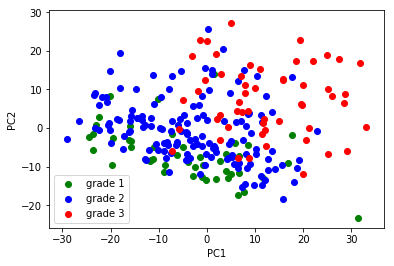

In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X.drop(columns='grade'))

pca_f = pca.transform(X.drop(columns='grade'))

plt.scatter(pca_f[X['grade'] == 1][:, 0], pca_f[X['grade'] == 1][:, 1], c='green')
plt.scatter(pca_f[X['grade'] == 2][:, 0], pca_f[X['grade'] == 2][:, 1], c='blue')
plt.scatter(pca_f[X['grade'] == 3][:, 0], pca_f[X['grade'] == 3][:, 1], c='red')
plt.legend(['grade 1', 'grade 2', 'grade 3'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

It seems to be not enough. I will do another feature reduction.

### Reduce more features using Classifier

I want to extract genes which has more impact on each grade.

So, let me train SVM and remove features whose weight is nearly zero.

First, I will make one-hot encoding function to do binary classification.

In [70]:
def one_hot(labels, i):
    new_labels = np.zeros(labels.shape)
    new_labels[labels == i] = 1
    
    return new_labels

#### Grade 1 Linear SVM

In [71]:
param_grid = {
    'kernel': ['linear'],
    'C': [0.01, 0.03, 0.07, 0.1, 0.3, 0.7, 1.0]
}

grid_svc1 = GridSearchCV(SVC(), param_grid, cv=5, iid=False)
grid_svc1.fit(X[labels].values, one_hot(y, 1))
svc1 = grid_svc1.best_estimator_

print(svc1.score(X[labels], one_hot(y, 1)))
print(cross_val_score(svc1, X[labels], one_hot(y, 1), cv=5))

0.983739837398374
[0.84       0.83673469 0.83673469 0.81632653 0.7755102 ]


In [72]:
svc1.coef_[:, :100]

array([[ 0.00593308,  0.00765214, -0.00619307, -0.00425752, -0.11244223,
         0.0494723 , -0.02548089, -0.00973254, -0.03182342,  0.00939914,
         0.02222937,  0.03478155, -0.01539105, -0.04194715,  0.01803726,
         0.01062384,  0.01196089,  0.0647866 , -0.04960167, -0.10454248,
        -0.05544823, -0.01085465,  0.02817826,  0.05862421, -0.01875726,
         0.04366407, -0.0152733 , -0.04295156,  0.07177048,  0.00106997,
        -0.03062432,  0.00789795, -0.01740882,  0.00522622, -0.02949589,
        -0.04342872,  0.01988192, -0.05600915, -0.02426902, -0.01422213,
        -0.00485276, -0.04956566, -0.00609225, -0.02972533,  0.06027505,
         0.02664352,  0.1013843 , -0.0825076 , -0.01049992, -0.00448042,
         0.03129622, -0.0166962 , -0.03786774, -0.06113259, -0.01043492,
         0.00093824,  0.06499123, -0.00973562, -0.01209108,  0.00382885,
        -0.01531432,  0.00868154,  0.03663363, -0.05926939,  0.01484677,
         0.09620899, -0.0434439 ,  0.04070857,  0.0

In [73]:
new_labels_one = labels[np.abs(svc1.coef_).reshape(-1) >= 0.05]
print('Grade 1:')
print(new_labels_one)

Grade 1:
['AC023490.3' 'ACSF2' 'ADRA2A' 'AEBP1' 'AGGF1_2' 'AK6' 'ANKMY2' 'APOBEC3B'
 'ARHGEF12_2' 'ARL1_2' 'ASPM' 'ATP2B4_1' 'AZGP1_1' 'BBIP1_2' 'BCL11B'
 'BCL2_2' 'BIRC5_2' 'BTG2_2' 'BUB1_2' 'C14orf132' 'CA12_5' 'CA12_6'
 'CACNA1D_2' 'CAST_3' 'CBFB_2' 'CCDC170' 'CCNB2' 'CCPG1_2' 'CD160' 'CD207'
 'CD2AP' 'CD302' 'CDC20' 'CDC6_2' 'CDC7' 'CDKN3' 'CENPU' 'CHRM3' 'CLDN5'
 'CLUL1' 'CMKLR1_1' 'CNR1_3' 'COX5A' 'COX6CP1' 'CSAD' 'CSAG3' 'CST5'
 'CTNNA1_2' 'DEPTOR' 'DFFA' 'DHX29' 'DICER1_2' 'DIXDC1' 'DLGAP5' 'DLX2_1'
 'DNAJC12' 'DOK1_1' 'DYNC1I2P1' 'EPHX2' 'ERBB4_2' 'ESR1_1' 'FA2H' 'FAAH'
 'FAM13B' 'FAM174B_1' 'FAM30A_1' 'FEM1C' 'FGFBP1' 'FMO5_1' 'FRY_1'
 'GABBR2_4' 'GAGE12F_3' 'GALC_1' 'GARS' 'GNG11' 'GOLM1' 'GPC4_2' 'GRHPR_1'
 'H2AFX_1' 'HBP1_2' 'HEMK1_1' 'HHAT' 'HMGA1_1' 'HMGB3' 'HSD17B4' 'IDH2_2'
 'IGFBP4' 'IL6ST_2' 'IL6ST_4' 'IL6ST_5' 'IMPA2' 'ITGBL1_2' 'JADE2_2'
 'JPT1' 'KCTD14_1' 'KIAA0040_1' 'KIAA0232' 'KIF13B' 'KIF2C_1' 'KIF4A'
 'LAMP5' 'LEPR_2' 'LGALS8_1' 'LMNB1' 'LSM8' 'MAGI2_2' 'MAP3

In [74]:
print('Number of genes which has more impact on grade 1:', len(new_labels_one))

Number of genes which has more impact on grade 1: 175


#### Grade 2 Linear SVM

In [75]:
param_grid = {
    'kernel': ['linear'],
    'C': [0.01, 0.03, 0.07, 0.1, 0.3, 0.7, 1.0]
}

grid_svc2 = GridSearchCV(SVC(), param_grid, cv=5, iid=False)
grid_svc2.fit(X[labels].values, one_hot(y, 2))
svc2 = grid_svc2.best_estimator_

print(svc2.score(X[labels], one_hot(y, 2)))
print(cross_val_score(svc2, X[labels], one_hot(y, 2), cv=5))

0.9105691056910569
[0.66       0.67346939 0.75510204 0.73469388 0.55102041]


In [76]:
svc2.coef_[:, :100]

array([[-5.09790229e-02, -3.35298301e-02,  2.60098609e-02,
        -1.38463247e-02,  2.53128701e-02,  1.08348367e-02,
         4.06794062e-02, -9.70958290e-03,  4.22713396e-04,
        -9.84450108e-03,  4.59528432e-03, -7.78309175e-03,
         7.05587313e-03,  4.99973442e-03, -2.08102522e-02,
        -1.41843838e-02, -1.02026801e-02, -2.50752504e-02,
         8.42747721e-02,  1.18984777e-01,  5.24238343e-02,
         2.13366189e-02,  3.35333257e-02, -2.85582464e-02,
        -7.18906640e-03, -4.29844791e-02, -1.33758124e-02,
         4.09828356e-04, -4.22443445e-02, -2.58688590e-02,
         9.59805131e-03, -2.35199875e-02,  1.77784736e-02,
        -2.56744164e-02, -4.88408523e-03,  2.74155208e-02,
        -1.35708567e-02,  7.18026604e-03,  6.04102206e-03,
         2.67845663e-02, -2.49692606e-03, -3.29303587e-03,
         3.28908502e-02,  4.15686612e-02, -4.17691177e-02,
        -1.67997962e-02, -9.29230412e-02,  3.34652446e-02,
        -1.82445402e-02, -2.82535677e-02, -4.13442688e-0

In [77]:
new_labels_two = labels[np.abs(svc2.coef_).reshape(-1) >= 0.05]
print('Grade 2:')
print(new_labels_two)

Grade 2:
['ABAT_2' 'ADGRG6' 'ADRA2A' 'AEBP1' 'ARHGEF12_2' 'BCL11B' 'BTG2_2'
 'CA12_5' 'CA12_6' 'CCL8' 'CCNE2_1' 'CD2AP' 'CDC20' 'CSAG3' 'CST5'
 'CX3CR1' 'DEPTOR' 'DIRAS3' 'EFHC1' 'FAM174B_1' 'FEM1C' 'FMO5_1' 'FMOD'
 'FRY_1' 'GOLM1' 'GRHPR_1' 'GRHPR_3' 'H2AFX_1' 'HTATIP2_1' 'HTRA2_1'
 'IL6ST_4' 'IMPA2' 'ITGB5_2' 'ITGBL1_2' 'JPT1' 'KCTD14_1' 'KIAA0232'
 'KIF2C_1' 'KIF4A' 'KLHL41' 'LEPR_2' 'LMNB2' 'LSM8' 'MAGED2' 'MAGI2_2'
 'MARCH8' 'MIR7112' 'MMP1' 'MMP16_1' 'MRPS14_2' 'N4BP2L2_4' 'NCAPD2'
 'NCOR1_1' 'NKX2-2' 'PDZRN3' 'PIR' 'PSD3_2' 'PTP4A2_3' 'RHOBTB1'
 'RNU4-46P' 'ROPN1B' 'SAA4' 'SATB1' 'SCUBE2' 'SESN1' 'SIK3_4' 'SLC19A2'
 'SLC7A5' 'SNX1_2' 'SQLE_1' 'STMN1' 'TDO2' 'TK1' 'TOGARAM1' 'TOX_1'
 'TSC22D3_1' 'TSC22D3_2' 'TTC39A_1' 'TTC3_3' 'TTK' 'TYMS' 'UQCRQ'
 'VGLL1_2' 'ZBED2' 'ZWINT' 'size']


In [78]:
print('Number of genes which has more impact on grade 1:', len(new_labels_two))

Number of genes which has more impact on grade 1: 86


#### Grade 3 Linear SVM

In [79]:
param_grid = {
    'kernel': ['linear'],
    'C': [0.01, 0.03, 0.07, 0.1, 0.3, 0.7, 1.0]
}

grid_svc3 = GridSearchCV(SVC(), param_grid, cv=5, iid=False)
grid_svc3.fit(X[labels].values, one_hot(y, 3))
svc3 = grid_svc3.best_estimator_

print(svc3.score(X[labels], one_hot(y, 3)))
print(cross_val_score(svc3, X[labels], one_hot(y, 3), cv=5))

0.975609756097561
[0.82       0.86       0.87755102 0.87755102 0.83333333]


In [80]:
svc3.coef_[:, :100]

array([[ 0.03624777,  0.02383599, -0.00544078,  0.01517843,  0.02607777,
        -0.00473898, -0.00935133,  0.0222307 ,  0.01290172, -0.00536596,
        -0.01663473, -0.00992828, -0.00525784,  0.00696318,  0.00814298,
         0.00278035,  0.01291184, -0.06267604, -0.03289246,  0.00048653,
        -0.03825736, -0.02637421, -0.01805792,  0.01459585,  0.01236938,
         0.00363916,  0.01762524,  0.01111834,  0.016249  ,  0.00414265,
         0.01378204,  0.00375106, -0.00804565,  0.01724306,  0.03175668,
        -0.03082442, -0.00482002,  0.00551328,  0.01698914, -0.02663368,
        -0.00088162, -0.03224635, -0.01244774, -0.01537328,  0.02701189,
         0.00077224,  0.02838776, -0.00805602,  0.00591027,  0.03321357,
         0.00868712, -0.01394496,  0.00865725, -0.01512705,  0.01684609,
         0.01287276, -0.01723505,  0.01311596,  0.0060063 , -0.01087356,
         0.00239449,  0.01717033, -0.02244953,  0.01246607, -0.01355852,
        -0.01163606,  0.0104786 ,  0.00980661,  0.0

In [81]:
new_labels_three = labels[np.abs(svc3.coef_).squeeze() >= 0.05]
print('Grade 3:')
print(new_labels_three)

Grade 3:
['ACSF2' 'BTG2_2' 'CA12_5' 'CA12_6' 'CCNB1' 'CST5' 'CYBRD1' 'FA2H' 'FMOD'
 'FRY_1' 'GPM6B_2' 'HTATIP2_1' 'KLHL41' 'LMNB2' 'MAGED2' 'MIR7112'
 'RABEP1_2' 'RHOBTB1' 'ROPN1B' 'SCUBE2' 'TDO2' 'THBD_1' 'TTC39A_1'
 'VGLL1_2' 'ZNF432' 'size']


In [82]:
print('Number of genes which has more impact on grade 1:', len(new_labels_three))

Number of genes which has more impact on grade 1: 26


I will concat all genes.

In [83]:
new_labels = np.concatenate([new_labels_one, new_labels_two, new_labels_three])
new_labels = np.unique(new_labels)
print('Number of genes:', new_labels.shape)

Number of genes: (218,)


### Plot of Gene

I will plot gene expression of first gene in each grade.

#### Grade 1

D:\Users\jylee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


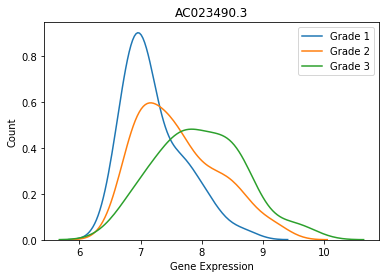

In [84]:
sns.kdeplot(total_data[total_data['grade'] == 1][new_labels_one[0]])
sns.kdeplot(total_data[total_data['grade'] == 2][new_labels_one[0]])
sns.kdeplot(total_data[total_data['grade'] == 3][new_labels_one[0]])
plt.xlabel('Gene Expression')
plt.ylabel('Count')
plt.legend(['Grade 1', 'Grade 2', 'Grade 3'])
plt.title(new_labels_one[0])
plt.show()

#### Grade 2

D:\Users\jylee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


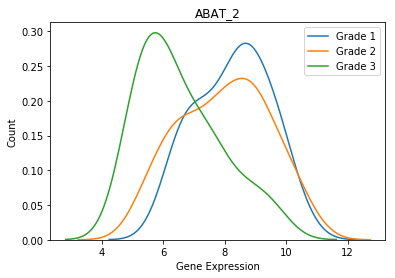

In [85]:
sns.kdeplot(total_data[total_data['grade'] == 1][new_labels_two[0]])
sns.kdeplot(total_data[total_data['grade'] == 2][new_labels_two[0]])
sns.kdeplot(total_data[total_data['grade'] == 3][new_labels_two[0]])
plt.xlabel('Gene Expression')
plt.ylabel('Count')
plt.legend(['Grade 1', 'Grade 2', 'Grade 3'])
plt.title(new_labels_two[0])
plt.show()

#### Grade 3

D:\Users\jylee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


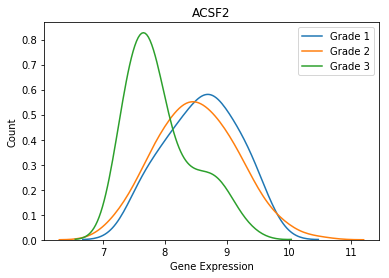

In [86]:
sns.kdeplot(total_data[total_data['grade'] == 1][new_labels_three[0]])
sns.kdeplot(total_data[total_data['grade'] == 2][new_labels_three[0]])
sns.kdeplot(total_data[total_data['grade'] == 3][new_labels_three[0]])
plt.xlabel('Gene Expression')
plt.ylabel('Count')
plt.legend(['Grade 1', 'Grade 2', 'Grade 3'])
plt.title(new_labels_three[0])
plt.show()

### Plot Datapoints

Let me plot genes!

First, let's see datapoints distribution with respect to new_labels_one (labels for grade 1).

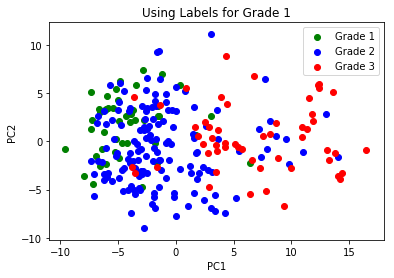

In [87]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(total_data[new_labels_one])

plt.scatter(X_pca[y == 1][:, 0], X_pca[y == 1][:, 1], c='green')
plt.scatter(X_pca[y == 2][:, 0], X_pca[y == 2][:, 1], c='blue')
plt.scatter(X_pca[y == 3][:, 0], X_pca[y == 3][:, 1], c='red')
plt.legend(['Grade 1', 'Grade 2', 'Grade 3'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Using Labels for Grade 1')
plt.show()

Second, let's see the datapoints distribution with respect to new_labels_two (labels for grade 2).

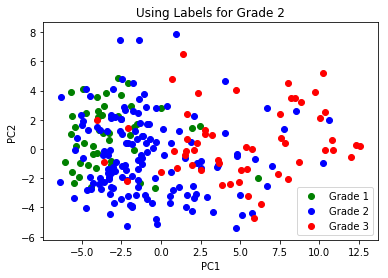

In [88]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(total_data[new_labels_two])

plt.scatter(X_pca[y == 1][:, 0], X_pca[y == 1][:, 1], c='green')
plt.scatter(X_pca[y == 2][:, 0], X_pca[y == 2][:, 1], c='blue')
plt.scatter(X_pca[y == 3][:, 0], X_pca[y == 3][:, 1], c='red')
plt.legend(['Grade 1', 'Grade 2', 'Grade 3'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Using Labels for Grade 2')
plt.show()

Finally, let's see the datapoints with respect to new_labels_three (labels for grade 3).

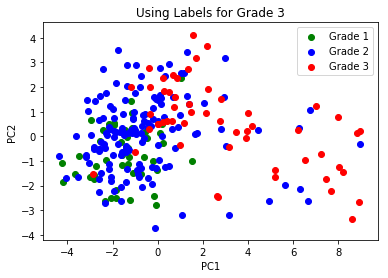

In [89]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(total_data[new_labels_three])

plt.scatter(X_pca[y == 1][:, 0], X_pca[y == 1][:, 1], c='green')
plt.scatter(X_pca[y == 2][:, 0], X_pca[y == 2][:, 1], c='blue')
plt.scatter(X_pca[y == 3][:, 0], X_pca[y == 3][:, 1], c='red')
plt.legend(['Grade 1', 'Grade 2', 'Grade 3'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Using Labels for Grade 3')
plt.show()

plot using all labels!

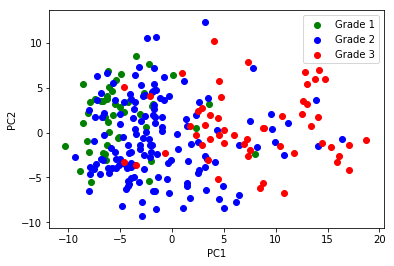

In [90]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(total_data[new_labels])

plt.scatter(X_pca[y == 1][:, 0], X_pca[y == 1][:, 1], c='green')
plt.scatter(X_pca[y == 2][:, 0], X_pca[y == 2][:, 1], c='blue')
plt.scatter(X_pca[y == 3][:, 0], X_pca[y == 3][:, 1], c='red')
plt.legend(['Grade 1', 'Grade 2', 'Grade 3'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Spliting Dataset

First, I want to remove some grade 2 samples because the number of samples whose grade is 2 is quite huge.

In [91]:
X = total_data[new_labels]
y = total_data['grade']

In [92]:
print('# of grade 1:', X[y == 1].shape[0])
print('# of grade 2:', X[y == 2].shape[0])
print('# of grade 3:', X[y == 3].shape[0])

print('# of all grade:', X.shape[0])
class_weight = [X.shape[0] / X[y == 1].shape[0], X.shape[0] / X[y == 2].shape[0], X.shape[0] / X[y == 3].shape[0]]
print('Class weights:', class_weight)

# of grade 1: 46
# of grade 2: 146
# of grade 3: 54
# of all grade: 246
Class weights: [5.3478260869565215, 1.6849315068493151, 4.555555555555555]


Okay. I will drop samples down to 60.

In [93]:
r = np.random.choice(np.arange(146), size=60, replace=False)

new_X = pd.concat([X.loc[y == 1], X.loc[y == 2].iloc[r],
                      X.loc[y == 3]], axis=0)
new_y = pd.concat([y[y == 1], y[y == 2][r], y[y == 3]])

print('X shape:', new_X.shape)
print('y shape:', new_y.shape)

print('# of grade 1:', new_X.loc[new_y == 1].shape[0])
print('# of grade 2:', new_X.loc[new_y == 2].shape[0])
print('# of grade 3:', new_X.loc[new_y == 3].shape[0])

X shape: (160, 218)
y shape: (160,)
# of grade 1: 46
# of grade 2: 60
# of grade 3: 54


Let's plot the new dataset 'new_X'.

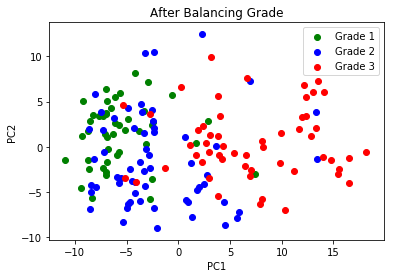

In [94]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_X[new_labels])

plt.scatter(X_pca[new_y == 1][:, 0], X_pca[new_y == 1][:, 1], c='green')
plt.scatter(X_pca[new_y == 2][:, 0], X_pca[new_y == 2][:, 1], c='blue')
plt.scatter(X_pca[new_y == 3][:, 0], X_pca[new_y == 3][:, 1], c='red')
plt.legend(['Grade 1', 'Grade 2', 'Grade 3'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('After Balancing Grade')
plt.show()

Let me split my data into training set and test set. I used test size to be 30 both not to overfit to training data and to maximize size of training dataset.

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [96]:
X_train, X_test, y_train, y_test = train_test_split(new_X[new_labels].values, new_y.values, test_size=40, random_state=31)

print(new_X.shape, new_y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# X_train, X_test, y_train, y_test = train_test_split(new_X[new_labels], new_y, test_size=30, random_state=11)

# print(X[new_labels].shape, y.shape)
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

(160, 218) (160,)
(120, 218) (120,)
(40, 218) (40,)


# Build Classifier

## Embedding

I inspired about word embedding method in natural language processing area and autoencoder.

### Word Embedding

Word embedding is some tasks that construct words which has similar characteristics into neighbored word vector.
Initially, word had been processed as one-hot encoded vector. But, using this one-hot encoding method is so inefficient because algorithms have no idea about how some words are simmilar. So, we need to transform feature space to some other thing. Word embedding technique is suit to this task.

Constructing word embedding is just supervised learning as follow.

![test](embedding2.JPG)

The objective of this network is not to predict better but training transformation part.
After training, We can use transformation to transform feature space of one hot vector word into embedding vector.

But, I can't this method in this project. So, I simplified this idea as bellow.

![text](embedding.PNG)

I will train linear regression model to predict f1 using all features. And I will train another linear regression model to predict f2 using all features, and so on.

I want to use only weights of this network. I want to do embedding feature vector into some space.

Also, I will apply kernel PCA in embedding process.

In [97]:
class Embedding:
    def __init__(self, grade):
        self.grade = grade
    
    def fit(self, X):
        self.num_genes = np.shape(X)[1]
        self.num_people = np.shape(X)[0]
        self.pca = None
        self.reg = None
        
        self.pca = KernelPCA(n_components=30, kernel='poly', gamma=1e-5, degree=2)
        self.pca.fit(X)

        new_X = self.pca.transform(X)
        
        self.reg = LinearRegression()
        self.reg.fit(new_X, X)
        
    def get(self):
        return self.reg.coef_
    
    def transform(self, X):
        new_X = self.pca.transform(X)
        return self.reg.predict(new_X)

In [98]:
embedding_weights = []

for g in range(1, 4):
    embedding = Embedding(grade=g)
    embedding.fit(X_train[y_train == g])
    embedding_weights.append(embedding)
    
    print(embedding_weights[g - 1].get().shape)

(218, 30)
(218, 30)
(218, 30)


If matrix multiplication is done to features, then the embedding features is produced.

Let's try making classifier.

In [99]:
class EmbeddingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1.0, kernel='linear', gamma='auto', degree=3, embedding_weights=None):
        self.C = C
        self.clf = []
        self.kernel = kernel
        self.gamma = gamma
        self.embedding_weights = embedding_weights
        self.degree = degree
    
    def fit(self, X, y):
        for g in range(3):
            embedding_weight = self.embedding_weights[g]
            
            new_X = embedding_weight.transform(X)
            new_y = one_hot(y, g + 1)
            
            svm = SVC(C=self.C, kernel=self.kernel, gamma=self.gamma, probability=True, degree=self.degree)
            svm.fit(new_X, new_y)
            self.clf.append(svm)
    
    def predict(self, X):
        pred_mat = np.zeros((np.shape(X)[0], 3))
        for g in range(3):
            embedding_weight = self.embedding_weights[g]
            
            new_X = embedding_weight.transform(X)
            
            svm = self.clf[g]
            pred_mat[:, g] = svm.predict_proba(new_X)[:, 1]
            
        pred = np.argmax(pred_mat, axis=1)
        
        return pred + 1
            
    def score(self, X, y):
        pred = self.predict(X)
        score = np.mean(pred == y)
        
        return score
    
    def one_hot(self, labels, i):
        new_labels = np.zeros(labels.shape)
        new_labels[labels == i] = 1

        return new_labels

In [100]:
clf = EmbeddingClassifier(C=0.05, embedding_weights=embedding_weights)
clf.fit(X_train, y_train)

print('Train accuracy:', clf.score(X_train, y_train))
print('CV accuracy:', cross_val_score(clf, X_test, y_test, cv=4))

Train accuracy: 0.7583333333333333
CV accuracy: [0.54545455 0.8        0.6        0.66666667]


#### Grid Search & Cross Validation

I will do cross validation and grid search to find optimized set of parameters.

In [101]:
param_grid = [
    {
        'C': [0.01, 0.03, 0.05, 0.08, 0.1, 0.3, 1],
        'kernel': ['linear']
    },
    {
        'C': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
        'kernel': ['poly'],
        'degree': [2, 3, 4, 5]
    }
]

gridClf1 = GridSearchCV(EmbeddingClassifier(embedding_weights=embedding_weights), param_grid, n_jobs=3, iid=False, cv=4)
gridClf1.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=EmbeddingClassifier(C=1.0, degree=3,
          embedding_weights=[<__main__.Embedding object at 0x000001A267EC2BE0>, <__main__.Embedding object at 0x000001A267EC2860>, <__main__.Embedding object at 0x000001A268C82EB8>],
          gamma='auto', kernel='linear'),
       fit_params=None, iid=False, n_jobs=3,
       param_grid=[{'C': [0.01, 0.03, 0.05, 0.08, 0.1, 0.3, 1], 'kernel': ['linear']}, {'C': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1], 'kernel': ['poly'], 'degree': [2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [102]:
print('Best cv score:', gridClf1.best_score_)
clf1 = EmbeddingClassifier(**gridClf1.best_params_, embedding_weights=embedding_weights)
clf1.fit(X_train, y_train)

print('Train accuracy:', clf1.score(X_train, y_train))
print('CV accuracy:', cross_val_score(clf1, X_train, y_train, cv=4))

Best cv score: 0.6513110632183907
Train accuracy: 0.725
CV accuracy: [0.625      0.63333333 0.55172414 0.72413793]


## K-Means Clustering Random Feature selection

I will use voting method to enhance performance. To do that, I will sample subset of features, and build classifier which use only subset of features.

![text](Cluster.jpg)

Using one cluster, make one classifier. I will split cluster several time and construct many classifiers.

In [103]:
from sklearn.cluster import KMeans

In [104]:
class RandomClusterClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_clusters=15, C=1.0, kernel='poly', degree=2, gamma='auto'):
        self.n_clusters = n_clusters
        self.clusters = None
        self.clf = []
        self.C = C
        self.kernel = kernel
        self.degree = degree
        self.gamma = gamma
    
    def fit(self, X, y):
        self.clusters = np.zeros((np.shape(X)[1], self.n_clusters))
        # data = np.zeros((np.shape(X)[0], np.shape(X)[1] + 1))
        # data[:, : -1] = X
        # data[:, -1] = y
        for c in range(self.n_clusters):
            # argument n_clusters of KMeans is 5 not self.n_clusters
            kmc = KMeans(n_clusters=5, n_init=1, max_iter=100, random_state=11)
            self.clusters[:, c] = kmc.fit_predict(X.T)
        
        for i in range(self.clusters.shape[1]):
            self.clf.append([])
            clusters = self.clusters[:, i]
            for c in range(5):
                features = X[:, clusters == c]
                if 0 in features.shape:
                    self.clf[i].append(None)
                    continue
                    
                svc = SVC(C=self.C, kernel=self.kernel, gamma=self.gamma, degree=self.degree)
                svc.fit(features, y)
                self.clf[i].append(svc)
    
    def predict(self, X):
        vote = np.zeros((np.shape(X)[0], 3))
        
        for i in range(self.clusters.shape[1]):
            clusters = self.clusters[:, i]
            for c in range(5):
                features = X[:, clusters == c]
                if 0 in features.shape:
                    continue
                    
                svc = self.clf[i][c]
                temp_pred = np.int32(svc.predict(features))
                
                for j in range(np.shape(X)[0]):
                    vote[j, temp_pred[j] - 1] += 1
        
        pred = np.argmax(vote, axis=1)
        return pred + 1
    
    def score(self, X, y):
        pred = self.predict(X)
        score = np.mean(pred == y)
        return score

#### Grid Search & Cross Validation

In [105]:
param_grid = [
    {
        'kernel': ['poly'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'degree': [2, 3, 4, 5, 6, 7],
        'gamma': ['auto']
    },
    {
        'kernel': ['rbf'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'gamma': ['auto', 0.01, 0.1, 1, 10]
    }
]

gridclf2 = GridSearchCV(RandomClusterClassifier(), param_grid, n_jobs=3, cv=4, iid=False)
gridclf2.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=RandomClusterClassifier(C=1.0, degree=2, gamma='auto', kernel='poly',
            n_clusters=15),
       fit_params=None, iid=False, n_jobs=3,
       param_grid=[{'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10], 'degree': [2, 3, 4, 5, 6, 7], 'gamma': ['auto']}, {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': ['auto', 0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [106]:
clf2 = RandomClusterClassifier(**gridclf2.best_params_)
clf2.fit(X_train, y_train)

In [107]:
print('Training acc:', clf2.score(X_train, y_train))
print('CV acc:', cross_val_score(clf2, X_train, y_train, cv=4))

Training acc: 0.9583333333333334
CV acc: [0.71875    0.73333333 0.65517241 0.79310345]


## Random Feature Selection

I will use same method as above. But, the difference is that random selection is done by sampling features at random.
I will not use K-means as feature clustering. I will just select some features at random and group them. Using this, I will build classifiers.

In [108]:
class RandomClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_clusters=15, C=1.0, kernel='poly', degree=2, gamma='auto'):
        self.n_clusters = n_clusters
        self.clusters = None
        self.clf = []
        self.C = C
        self.kernel = kernel
        self.degree = degree
        self.gamma = gamma
    
    def fit(self, X, y):
        self.clusters = np.zeros((np.shape(X)[1], self.n_clusters))
        # data = np.zeros((np.shape(X)[0], np.shape(X)[1] + 1))
        # data[:, : -1] = X
        # data[:, -1] = y
        for c in range(self.n_clusters):
            # argument n_clusters of KMeans is 5 not self.n_clusters
            # kmc = KMeans(n_clusters=5, n_init=1, max_iter=100, random_state=11)
            # self.clusters[:, c] = kmc.fit_predict(X.T)
            self.clusters[:, c] = np.random.choice(self.n_clusters, size=np.shape(X)[1])
        
        for i in range(self.clusters.shape[1]):
            self.clf.append([])
            clusters = self.clusters[:, i]
            for c in range(5):
                features = X[:, clusters == c]
                if 0 in features.shape:
                    self.clf[i].append(None)
                    continue
                    
                svc = SVC(C=self.C, kernel=self.kernel, gamma=self.gamma, degree=self.degree)
                svc.fit(features, y)
                self.clf[i].append(svc)
    
    def predict(self, X):
        vote = np.zeros((np.shape(X)[0], 3))
        
        for i in range(self.clusters.shape[1]):
            clusters = self.clusters[:, i]
            for c in range(5):
                features = X[:, clusters == c]
                if 0 in features.shape:
                    continue
                    
                svc = self.clf[i][c]
                temp_pred = np.int32(svc.predict(features))
                
                for j in range(np.shape(X)[0]):
                    vote[j, temp_pred[j] - 1] += 1
        
        pred = np.argmax(vote, axis=1)
        return pred + 1
    
    def score(self, X, y):
        pred = self.predict(X)
        score = np.mean(pred == y)
        return score

In [109]:
param_grid = [
    {
        'kernel': ['poly'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'degree': [2, 3, 4, 5],
        'gamma': ['auto']
    },
    {
        'kernel': ['rbf'],
        'gamma': ['auto', 0.01, 0.1, 1, 10]
    }
]

gridclf3 = GridSearchCV(RandomClassifier(), param_grid, cv=4, n_jobs=3, iid=False)
gridclf3.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=RandomClassifier(C=1.0, degree=2, gamma='auto', kernel='poly', n_clusters=15),
       fit_params=None, iid=False, n_jobs=3,
       param_grid=[{'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10], 'degree': [2, 3, 4, 5], 'gamma': ['auto']}, {'kernel': ['rbf'], 'gamma': ['auto', 0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [110]:
# clf3 = RandomClassifier(C=0.005, kernel='poly', degree=5, gamma=1)
# clf3.fit(X_train, y_train)

In [111]:
clf3 = RandomClassifier(**gridclf3.best_params_)
clf3.fit(X_train, y_train)

In [112]:
print('Training acc:', clf3.score(X_train, y_train))
print('CV acc:', cross_val_score(clf3, X_train, y_train, cv=4))

Training acc: 1.0
CV acc: [0.65625    0.66666667 0.72413793 0.72413793]


## Bagging

The next method is Bagging.
Bagging is the method which samples dataset randomly with replacement.
The size of sample is upto the size of total size of dataset.
Of course, I can reduce the sample size.

I will use decision tree as individual estimator. First, I want to test whether this classifier is a bit good.

In [113]:
bag = BaggingClassifier(DecisionTreeClassifier(max_depth=30), n_estimators=100, bootstrap_features=True, n_jobs=3, random_state=11)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=True, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=3, oob_score=False,
         random_state=11, verbose=0, warm_start=False)

In [114]:
print('Training acc:', bag.score(X_train, y_train))
print('CV acc:', cross_val_score(bag, X_train, y_train, cv=4))

Training acc: 1.0
CV acc: [0.6875     0.56666667 0.5862069  0.72413793]


Okay. Let me do grid search with cross validation.

#### Grid Search & Cross Validation

In [118]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'bootstrap_features': [True, False],
    'max_samples': [0.25, 0.5, 0.75, 1.0],
    'max_features': [0.25, 0.5, 0.75, 1.0],
    'base_estimator': [
        DecisionTreeClassifier(max_depth=5),
        DecisionTreeClassifier(max_depth=15),
        DecisionTreeClassifier(max_depth=30),
        DecisionTreeClassifier(max_depth=50),
        SVC(kernel='poly', gamma='auto', degree=2),
        SVC(kernel='poly', gamma='auto', degree=3),
        SVC(kernel='poly', gamma='auto', degree=4),
        SVC(kernel='poly', gamma='auto', degree=5),
        SVC(kernel='rbf', gamma='auto')
    ]
}

gridclf4 = GridSearchCV(BaggingClassifier(), param_grid, cv=4, n_jobs=3, iid=False)
gridclf4.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=3,
       param_grid={'n_estimators': [50, 100, 150], 'bootstrap_features': [True, False], 'max_samples': [0.25, 0.5, 0.75, 1.0], 'max_features': [0.25, 0.5, 0.75, 1.0], 'base_estimator': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=No...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [119]:
clf4 = BaggingClassifier(**gridclf4.best_params_)
clf4.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.25,
         max_samples=0.25, n_estimators=50, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [120]:
print('Training acc:', clf4.score(X_train, y_train))
print('CV acc:', cross_val_score(clf4, X_train, y_train, cv=4))

Training acc: 0.875
CV acc: [0.625      0.63333333 0.5862069  0.79310345]


## Random Forest

Also, We can use RandomForest.
The random forest is the method which consists of many decision tree.

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 10, 30, 50],
    'min_samples_split': [0.3, 0.5, 0.7],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_leaf_nodes': [None, 2, 3, 5]
}

gridclf5 = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=3, iid=False)
gridclf5.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=False, n_jobs=3,
       param_grid={'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 10, 30, 50], 'min_samples_split': [0.3, 0.5, 0.7], 'min_samples_leaf': [1, 2, 3, 4], 'max_leaf_nodes': [None, 2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [123]:
clf5 = RandomForestClassifier(**gridclf5.best_params_)
clf5.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=3,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=0.3,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [124]:
print('Training acc:', clf5.score(X_train, y_train))
print('CV acc:', cross_val_score(clf5, X_train, y_train, cv=4))

Training acc: 0.8166666666666667
CV acc: [0.65625    0.66666667 0.5862069  0.75862069]


## Test Accuracy

Finally, Let me test my models. I want to see confusion matrix to see false positive and false negative.

In [125]:
from sklearn.metrics import confusion_matrix

### Embedding Classifier

In [126]:
print('Test Acc:', clf1.score(X_test, y_test))

Test Acc: 0.725


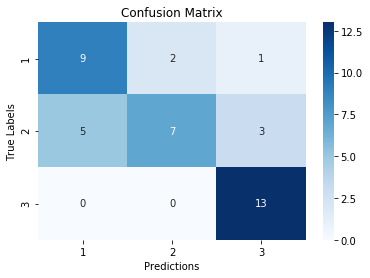

In [127]:
sns.heatmap(confusion_matrix(y_test, clf1.predict(X_test)), cmap='Blues', annot=True,
            xticklabels=[1, 2, 3],
            yticklabels=[1, 2, 3])
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()

### Random Cluster Classifier

In [128]:
print('Test Acc:', clf2.score(X_test, y_test))

Test Acc: 0.8


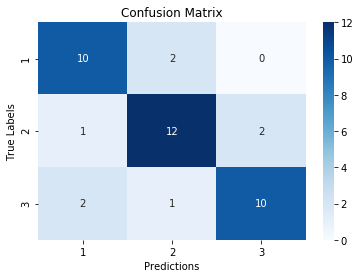

In [129]:
sns.heatmap(confusion_matrix(y_test, clf2.predict(X_test)), cmap='Blues', annot=True,
            xticklabels=[1, 2, 3],
            yticklabels=[1, 2, 3])
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()

### Random Classifier

In [130]:
print('Test Acc:', clf3.score(X_test, y_test))

Test Acc: 0.775


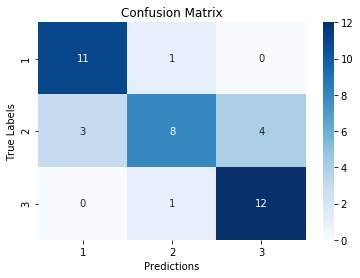

In [131]:
sns.heatmap(confusion_matrix(y_test, clf3.predict(X_test)), cmap='Blues', annot=True,
            xticklabels=[1, 2, 3],
            yticklabels=[1, 2, 3])
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()

### Bagging Classifier

In [132]:
print('Test Acc:', clf4.score(X_test, y_test))

Test Acc: 0.75


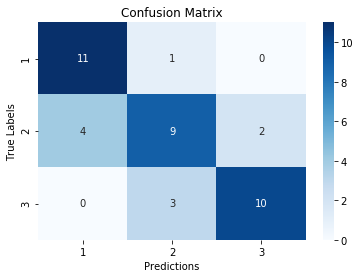

In [133]:
sns.heatmap(confusion_matrix(y_test, clf4.predict(X_test)), cmap='Blues', annot=True,
            xticklabels=[1, 2, 3],
            yticklabels=[1, 2, 3])
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()

### Random Forest

In [134]:
print('Test Acc:', clf5.score(X_test, y_test))

Test Acc: 0.725


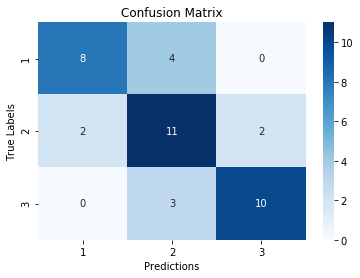

In [135]:
sns.heatmap(confusion_matrix(y_test, clf5.predict(X_test)), cmap='Blues', annot=True,
            xticklabels=[1, 2, 3],
            yticklabels=[1, 2, 3])
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()

# My Discussion

The algorithms looks hard to classify grade 2.
There are many cases where true label is 2 but, algoritm predicted it as 1 or 3.
Also, there are many cases where true label is not 2 but, algorithm predicted it as 2.
This may be because grade 2 is between grade 1 and 3.
As seeing scatter plot which show distribution with respect to each grade, datapoints whose grade 1 and 2 tend to be mixed.
And datapoints whose grade 2 and 3 tend to be mixed.
So, between grade 1 and 3, there are few false positive and false negative.

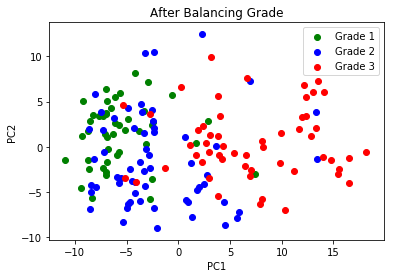

In [136]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_X[new_labels])

plt.scatter(X_pca[new_y == 1][:, 0], X_pca[new_y == 1][:, 1], c='green')
plt.scatter(X_pca[new_y == 2][:, 0], X_pca[new_y == 2][:, 1], c='blue')
plt.scatter(X_pca[new_y == 3][:, 0], X_pca[new_y == 3][:, 1], c='red')
plt.legend(['Grade 1', 'Grade 2', 'Grade 3'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('After Balancing Grade')
plt.show()

I think my result is not enough.
There will be so many factors which will have impact on cancer.
Also, my work is not enough because of my shallow knowledge.
I think I need more study about AI. This job motivates my passion!

In PBL1, PBL2 project, the dataset was image of digit so, the preprocessing looks easy.
But, in PBL3, I had some troubles to preprocess data. But, as doing the project, I learned about sequence data,
about genetic data, also about how to preprocess data which is not image.
I think, genetic problem is very critical problem. Especially, dicision to grade caner is very sensitive.
So, I think my result is not enough. I want to find another method regardless of class.
After this semester finished, this work deserve to be revisited.

This was very interesting project. I think this is good experience among my career.
I don't know there will be another chance to explore genetic dataset. This was great experience.
After taking this course, I think that math, statistics and linear algebra is so important.

I have some experience of deep learning.
But in this project, professor banned multi-layered architectures. I think that this was very good decision because I can have
better understanding to machine learning theory, I can learn more basic things of machine learning.
This project let me remind my machine learning knowledge and warn me not to stay my knowledge.

Thanks for motivating me. I will do my best.